<a href="https://colab.research.google.com/github/Mona2104/localRepo/blob/main/movie_genre_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
movie_df=pd.read_csv("/content/drive/MyDrive/Kaggle/Genre Classification Dataset/train_data.txt",
                        sep=":::" ,names = ['movie' , 'genre' , 'description'] , engine='python')

In [4]:
movie_df.head()

,movie,genre,description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [5]:
print(movie_df.shape[0])

54214


In [6]:
movie_df=movie_df[movie_df['genre']!='unknown']
movie_df.dropna(inplace=True)
print(movie_df.shape[0])

54214


In [7]:
print(movie_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   movie        54214 non-null  object
 1   genre        54214 non-null  object
 2   description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB
None


In [8]:
movie_df.describe()

,movie,genre,description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [9]:
class_count=movie_df['genre'].value_counts()
print(class_count)

genre
 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: count, dtype: int64


Now we analyze the imbalance ratio

In [10]:
imbalance_ratio=class_count.min()/class_count.max()
print(imbalance_ratio)

0.009696613531183427


Data Visualisation

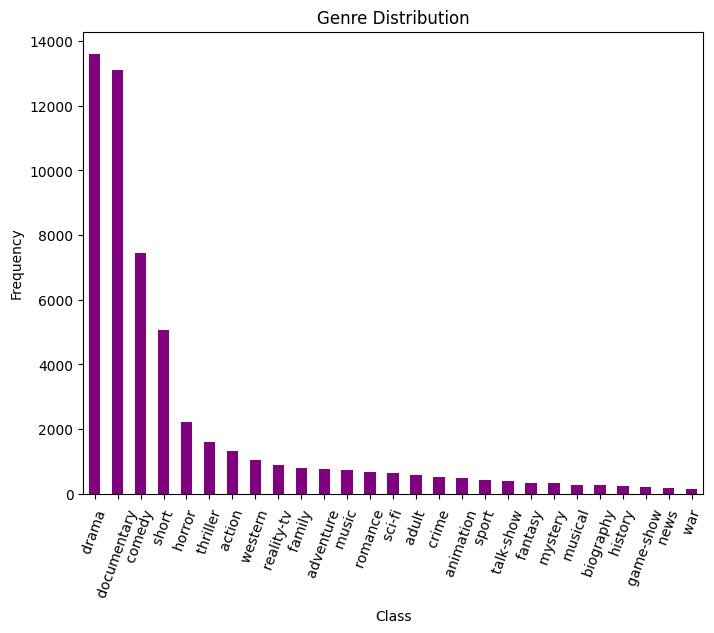

In [11]:
plt.figure(figsize=(8,6))
class_count.plot(kind='bar',color='purple')
plt.title('Genre Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=70)
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


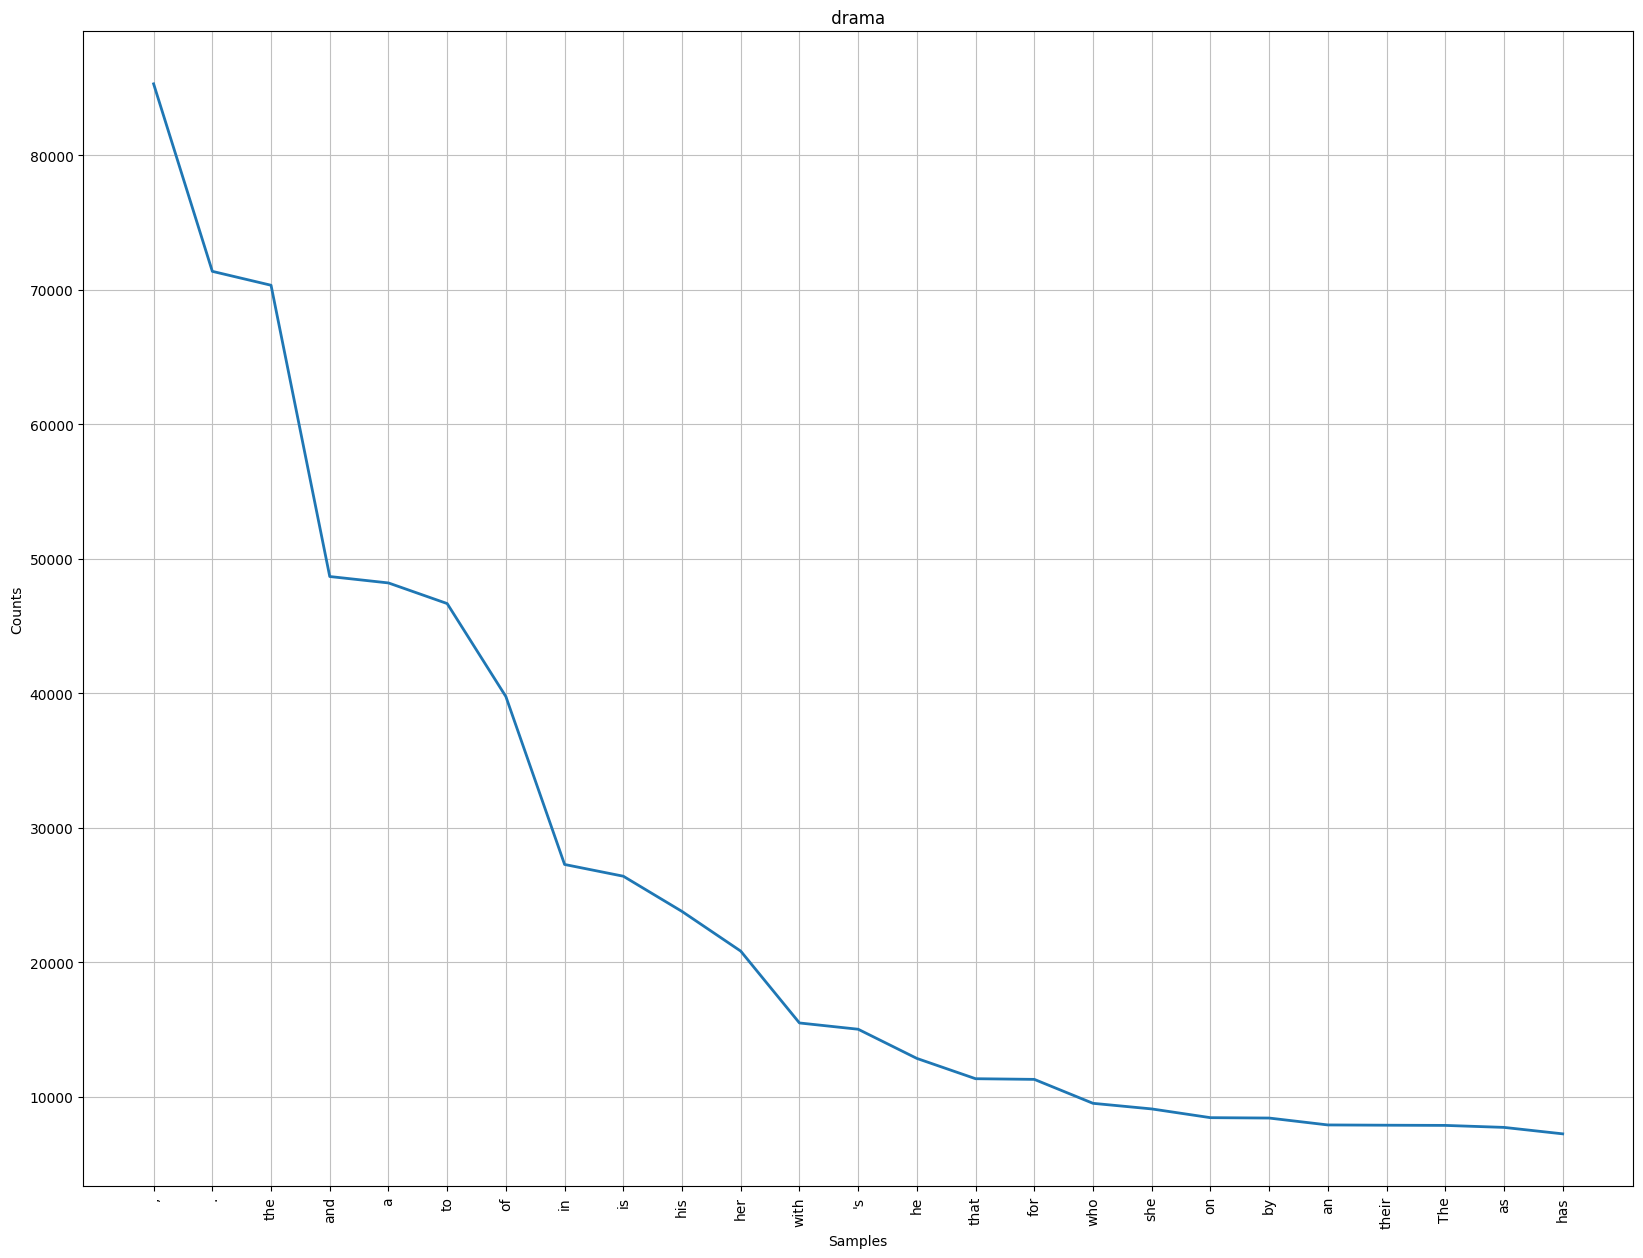

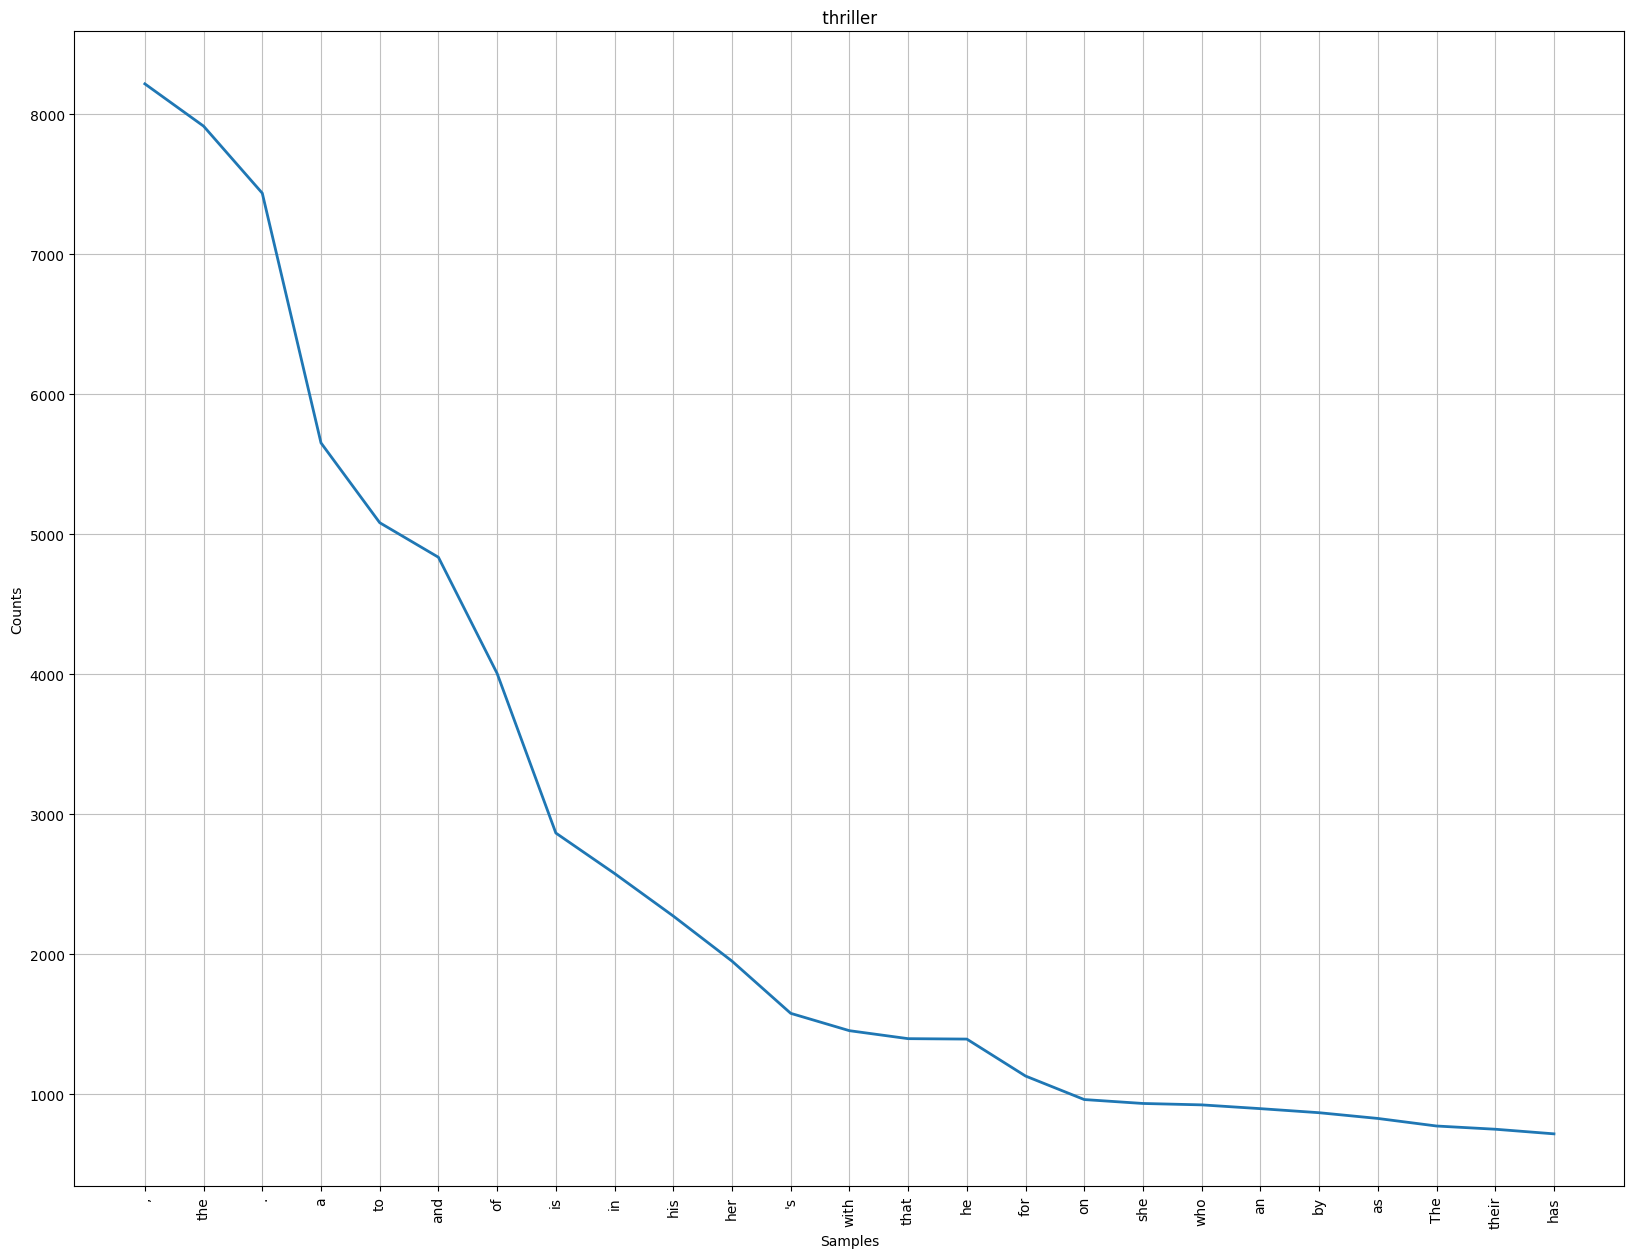

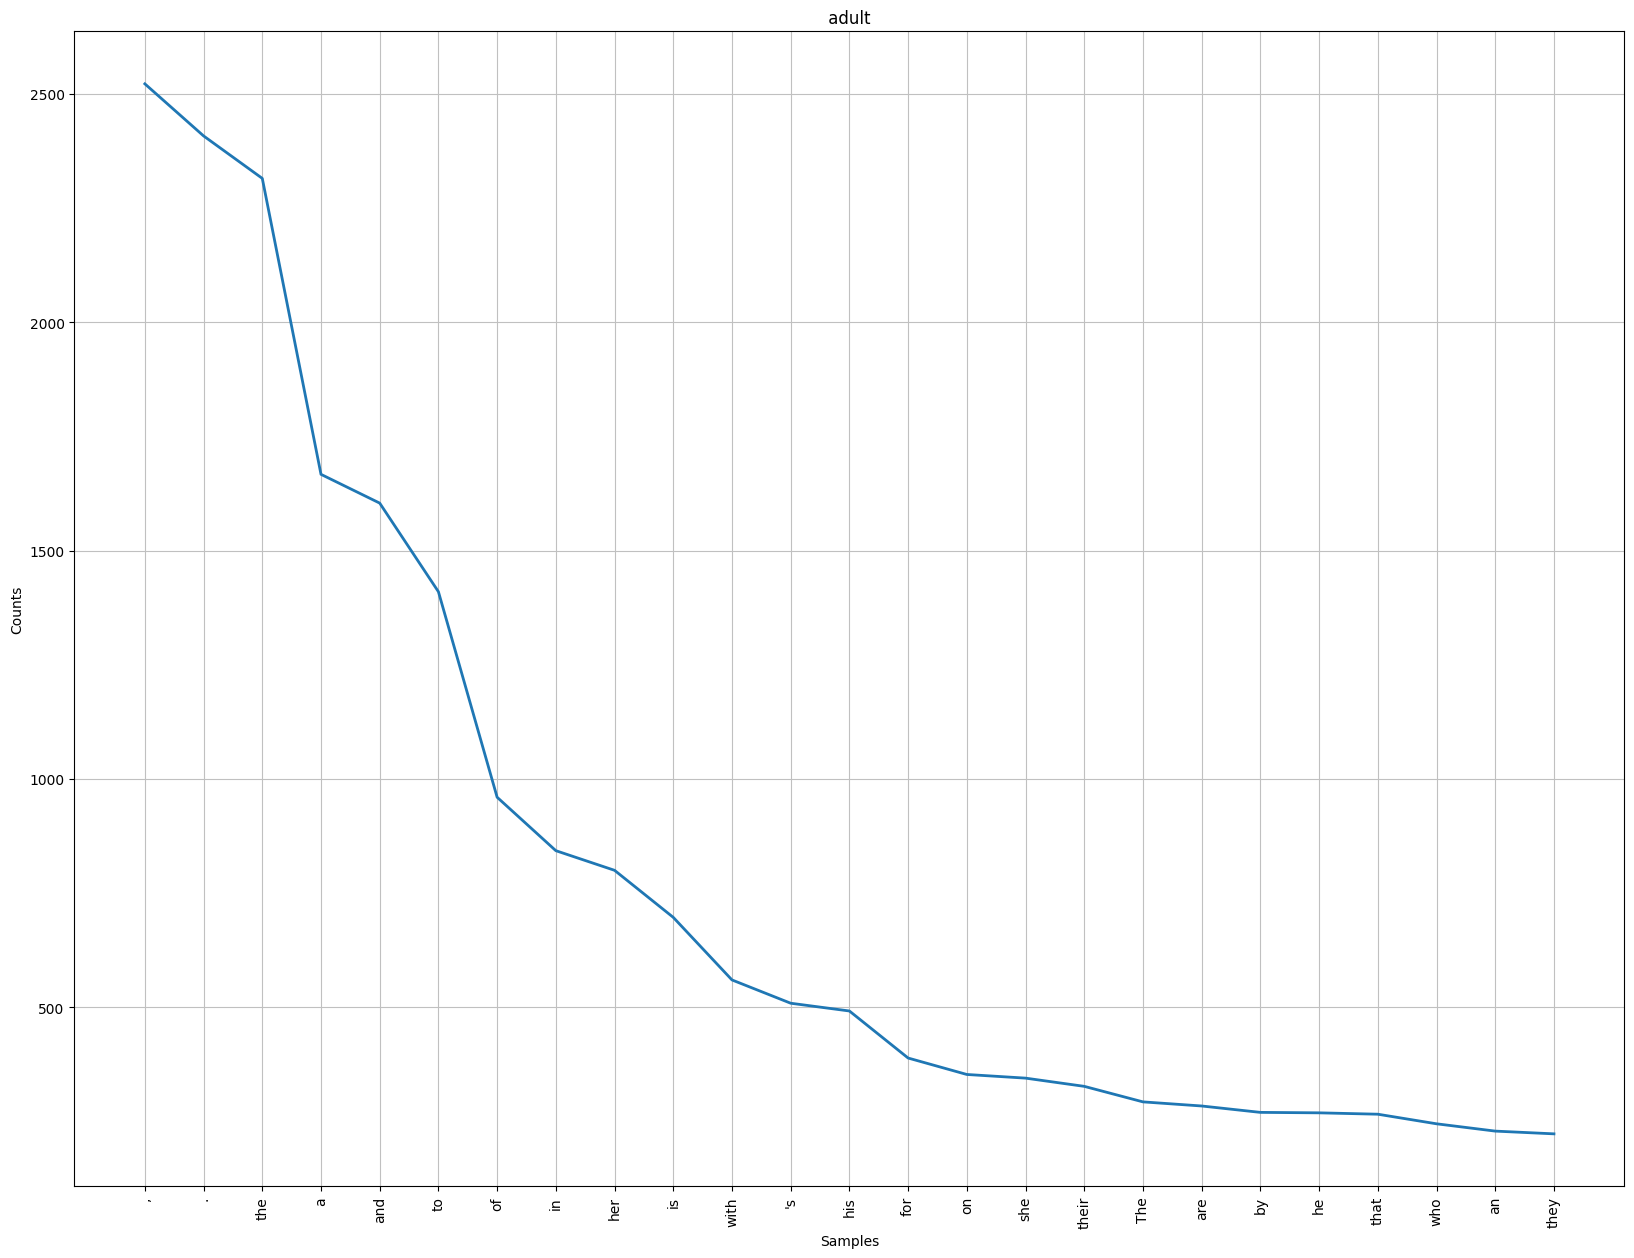

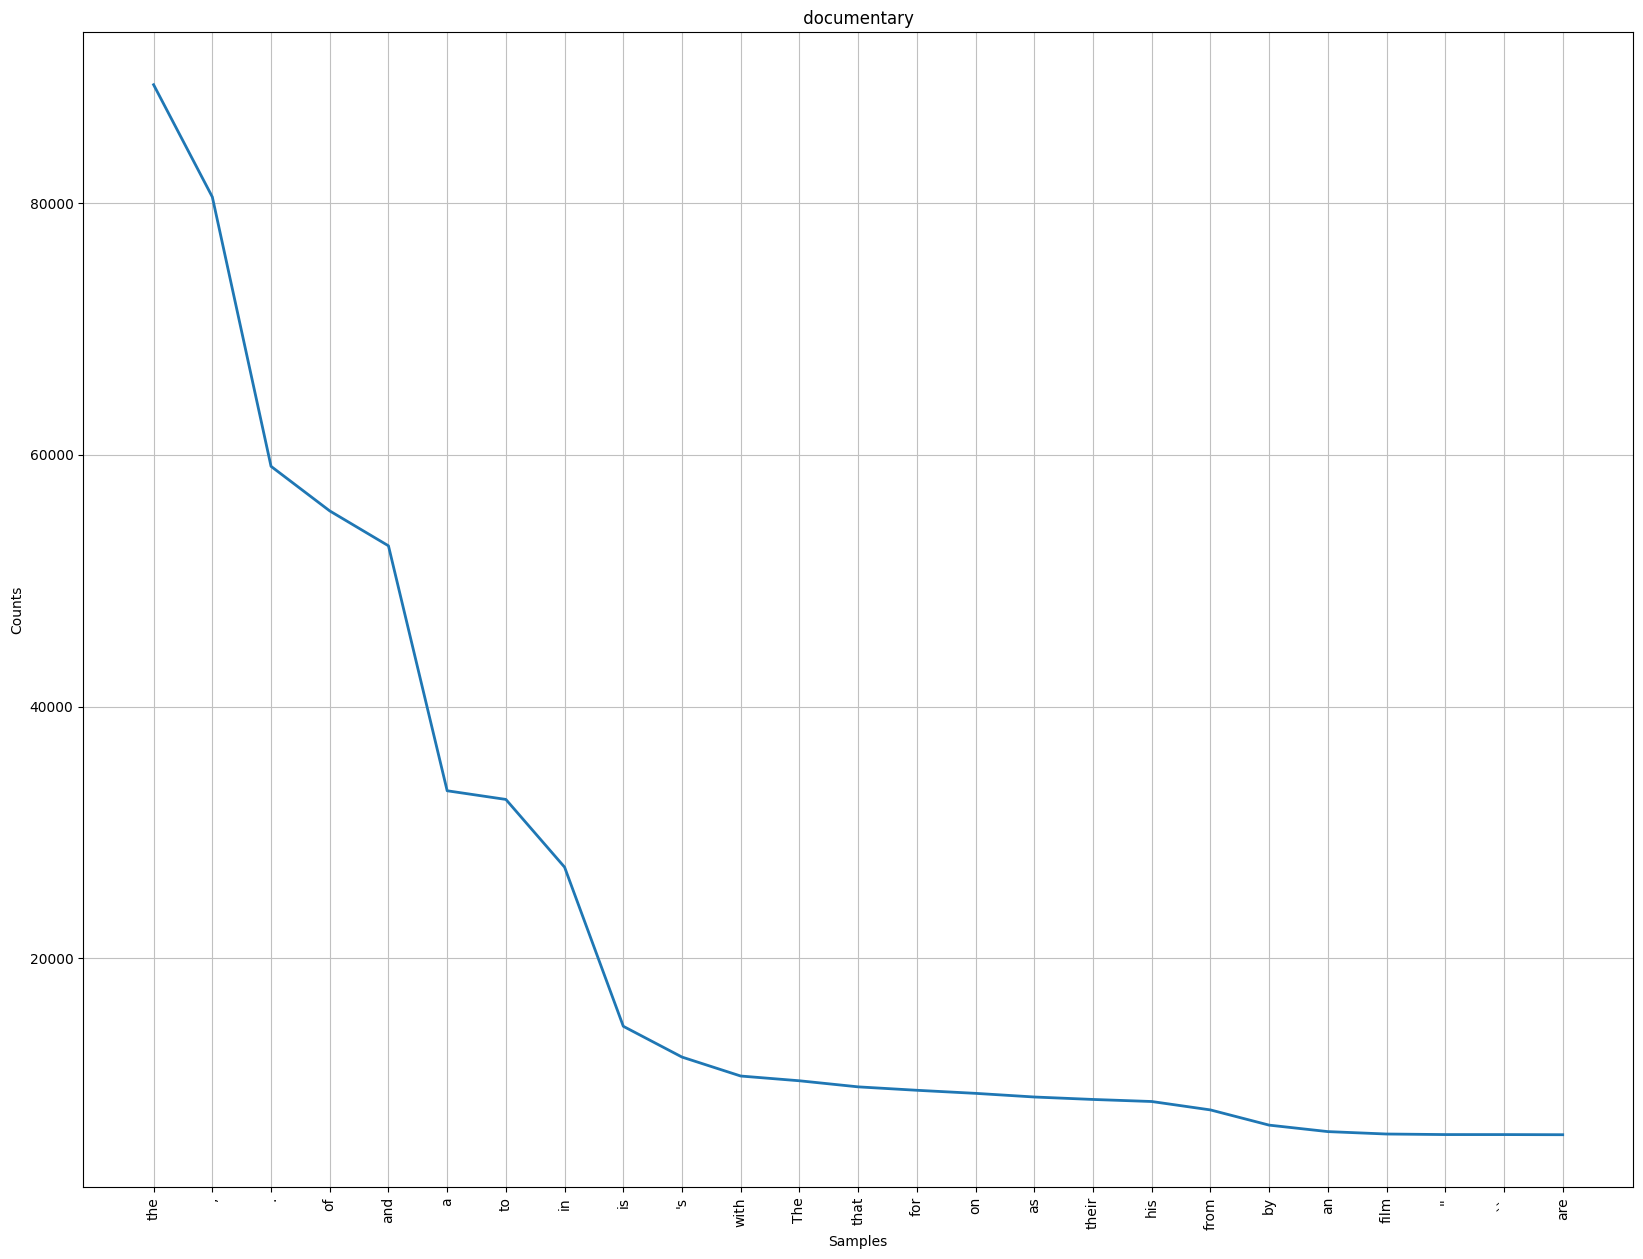

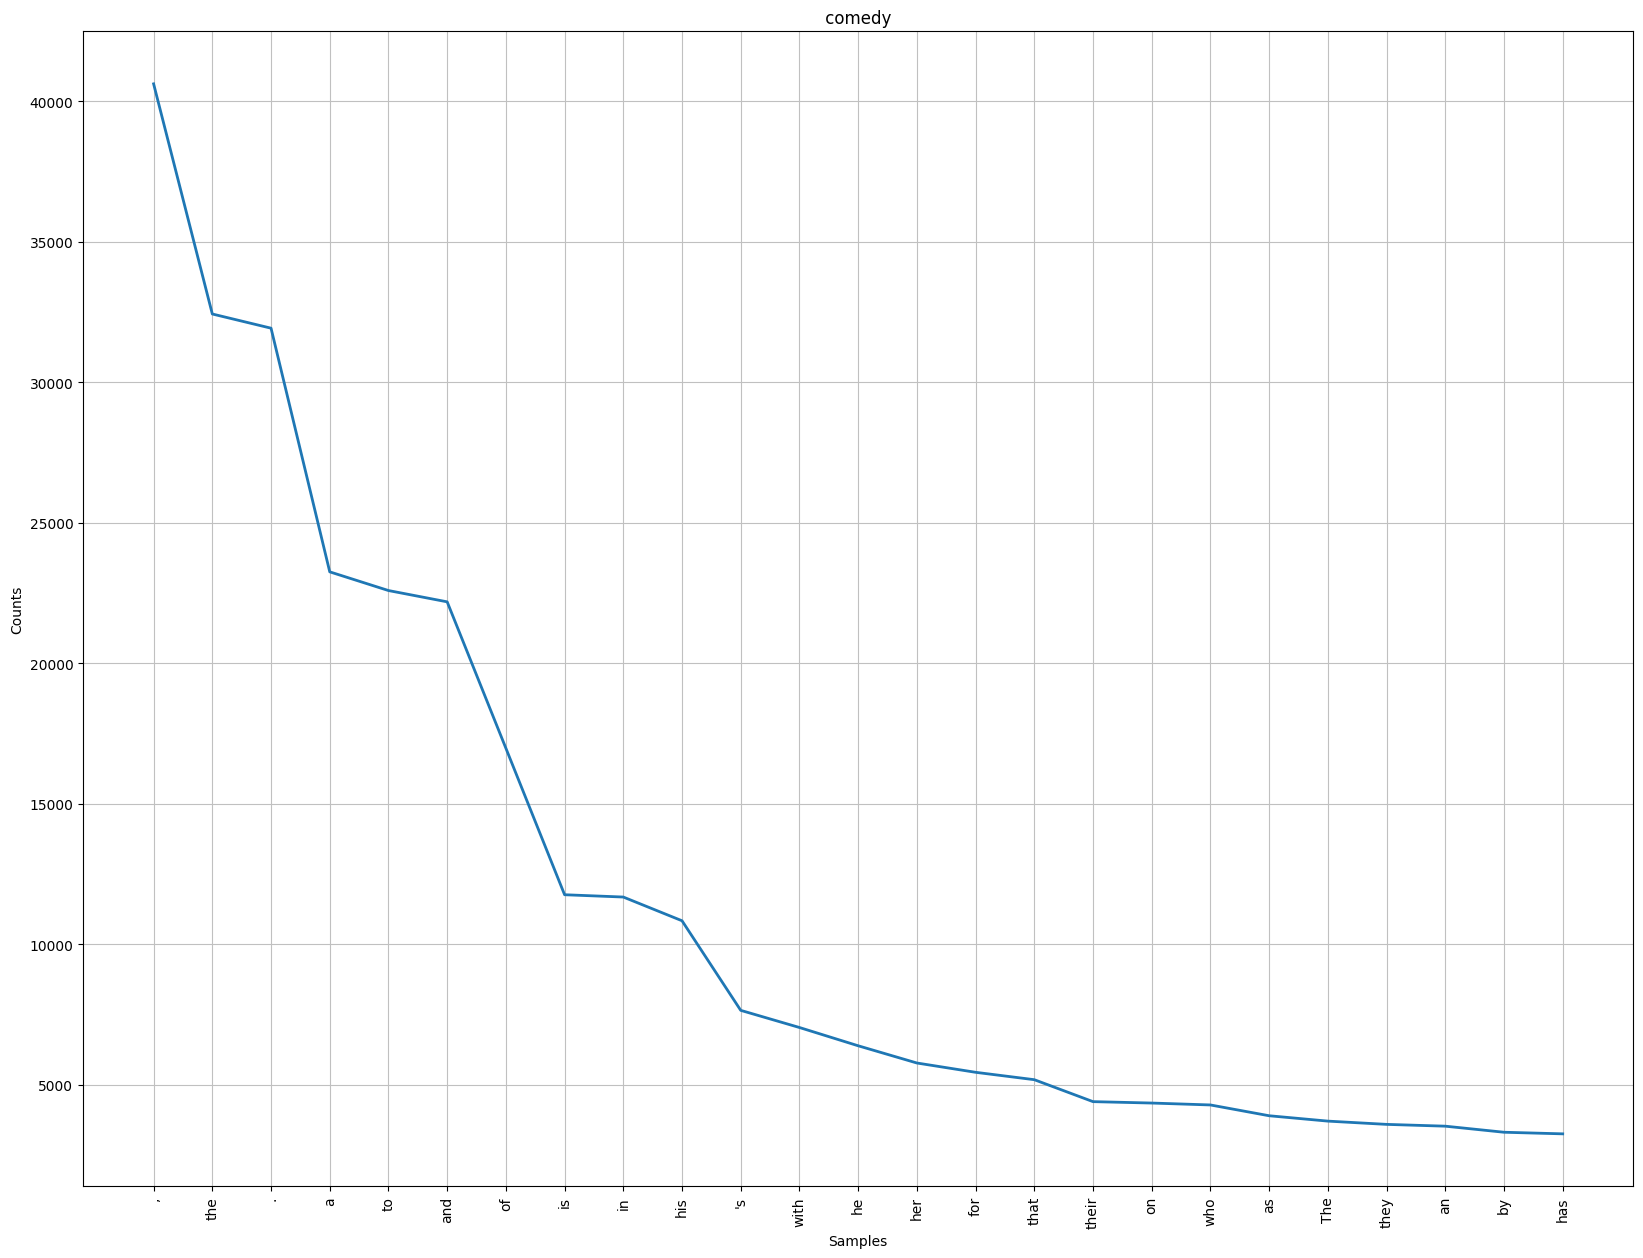

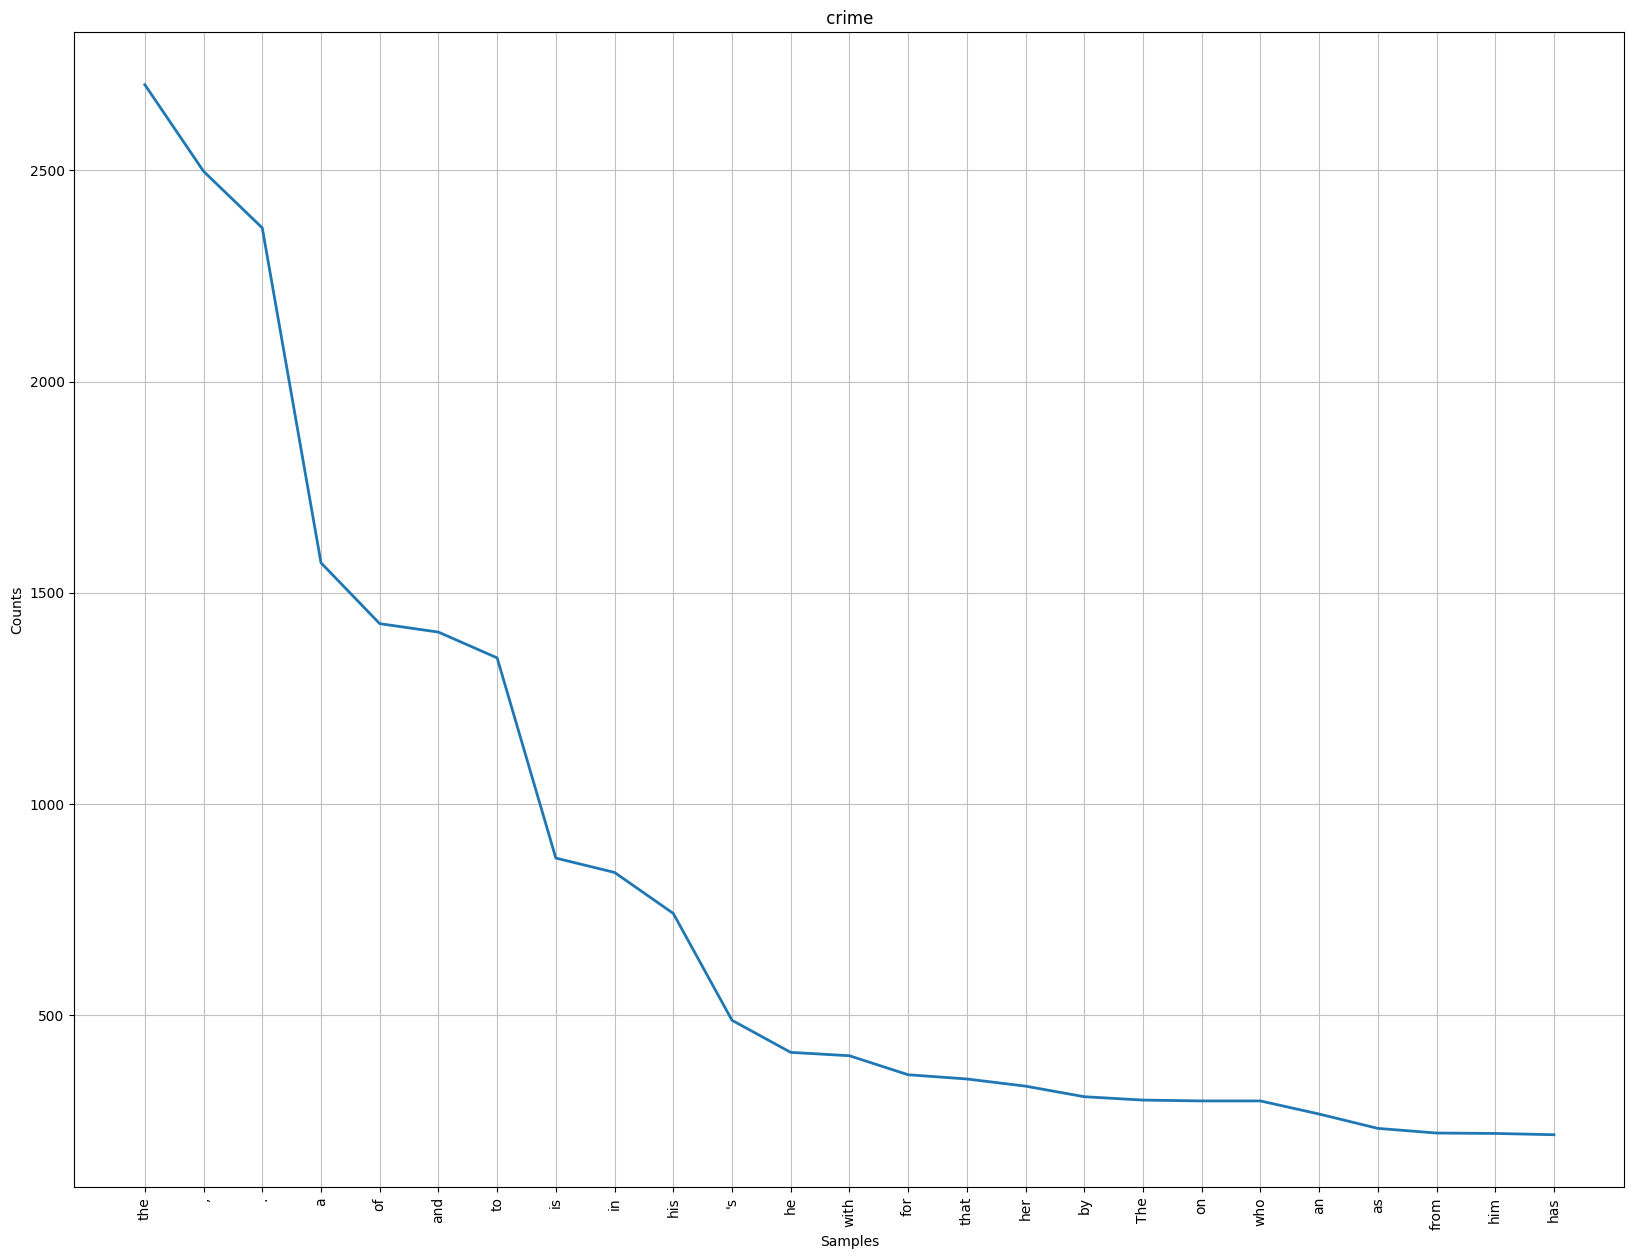

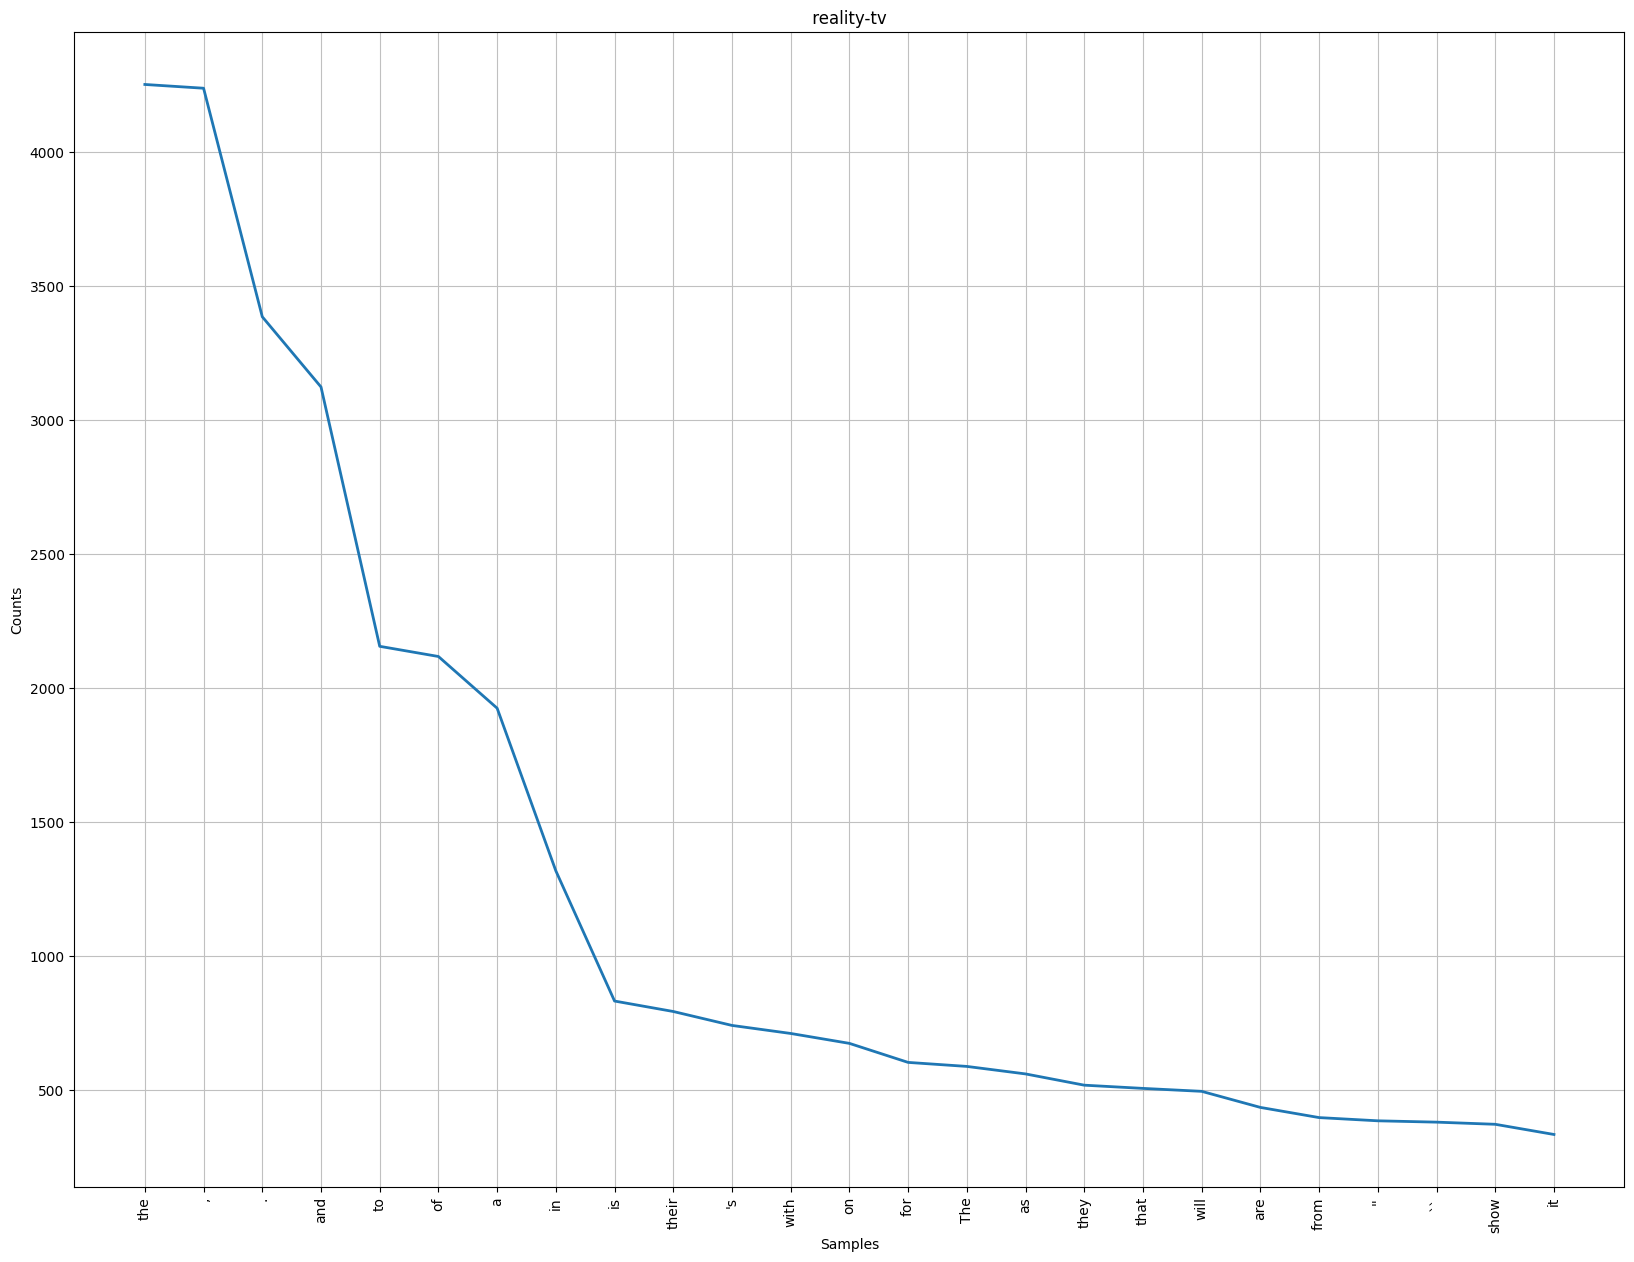

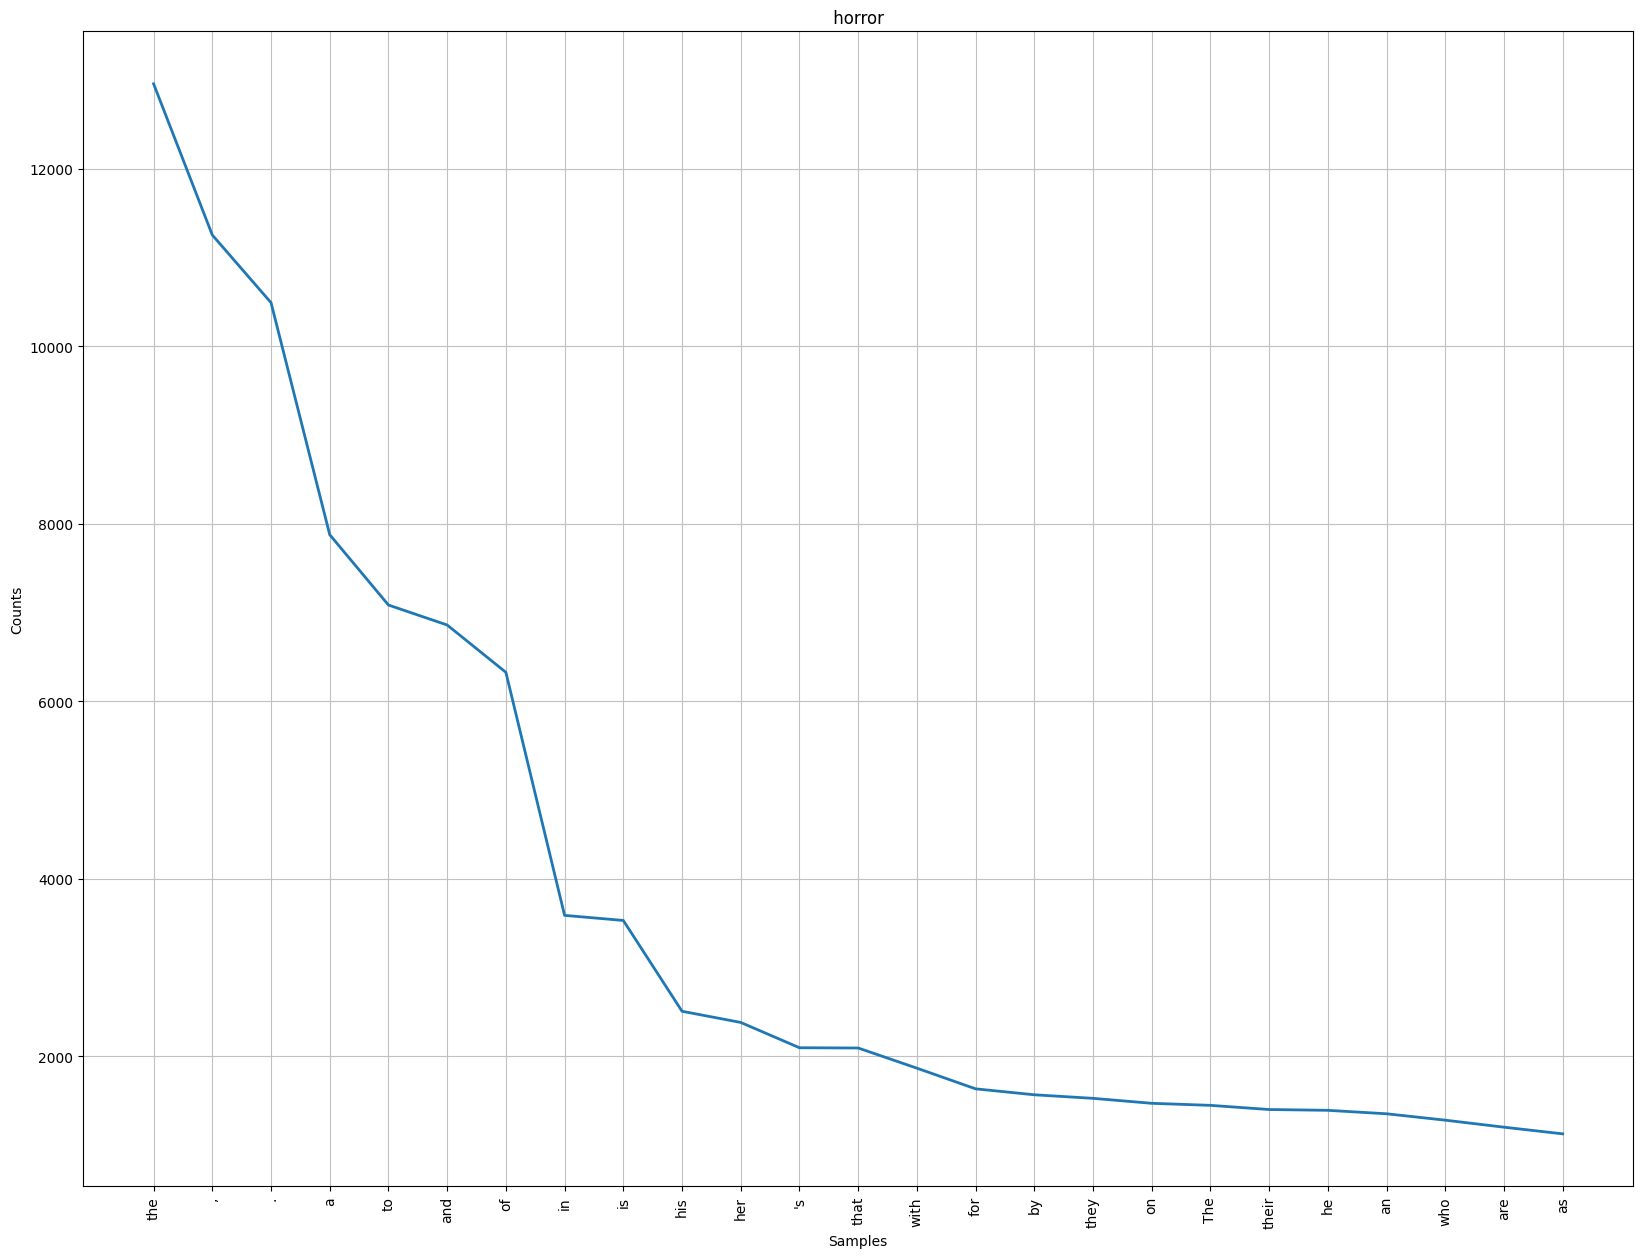

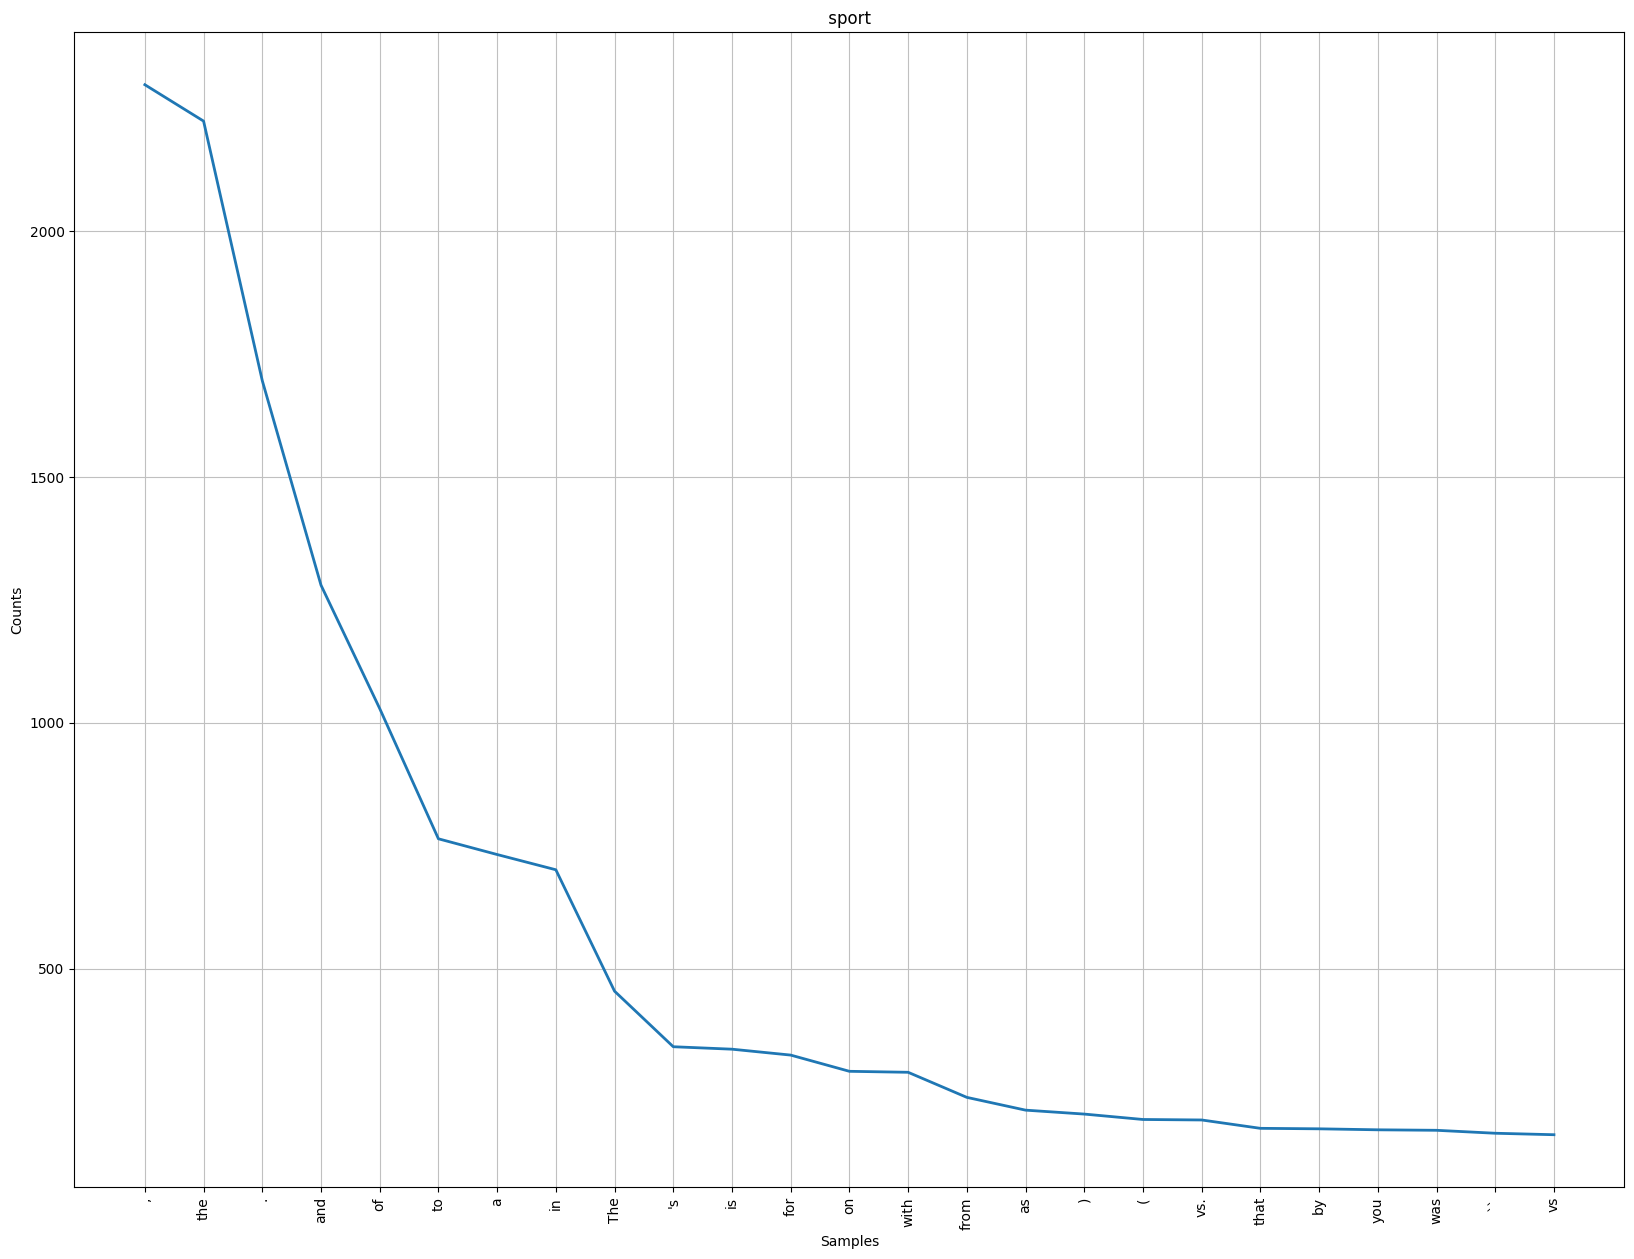

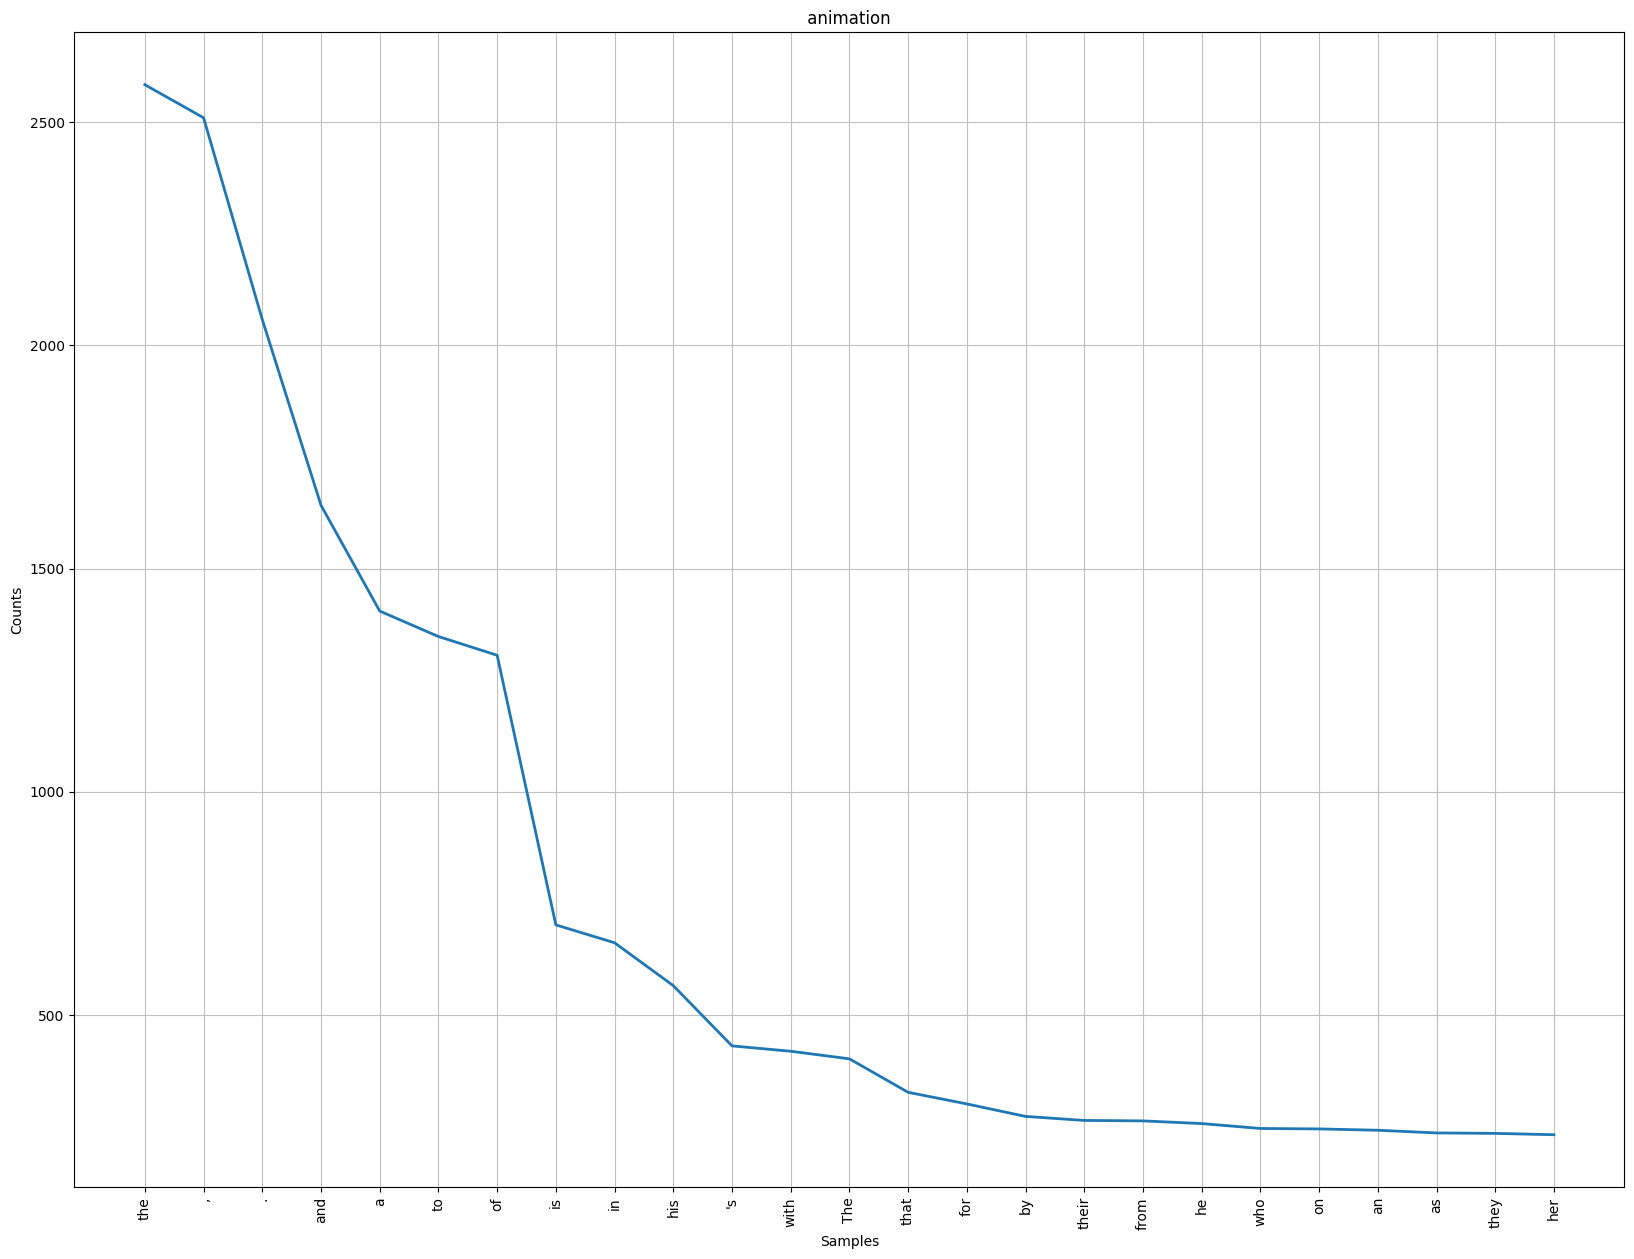

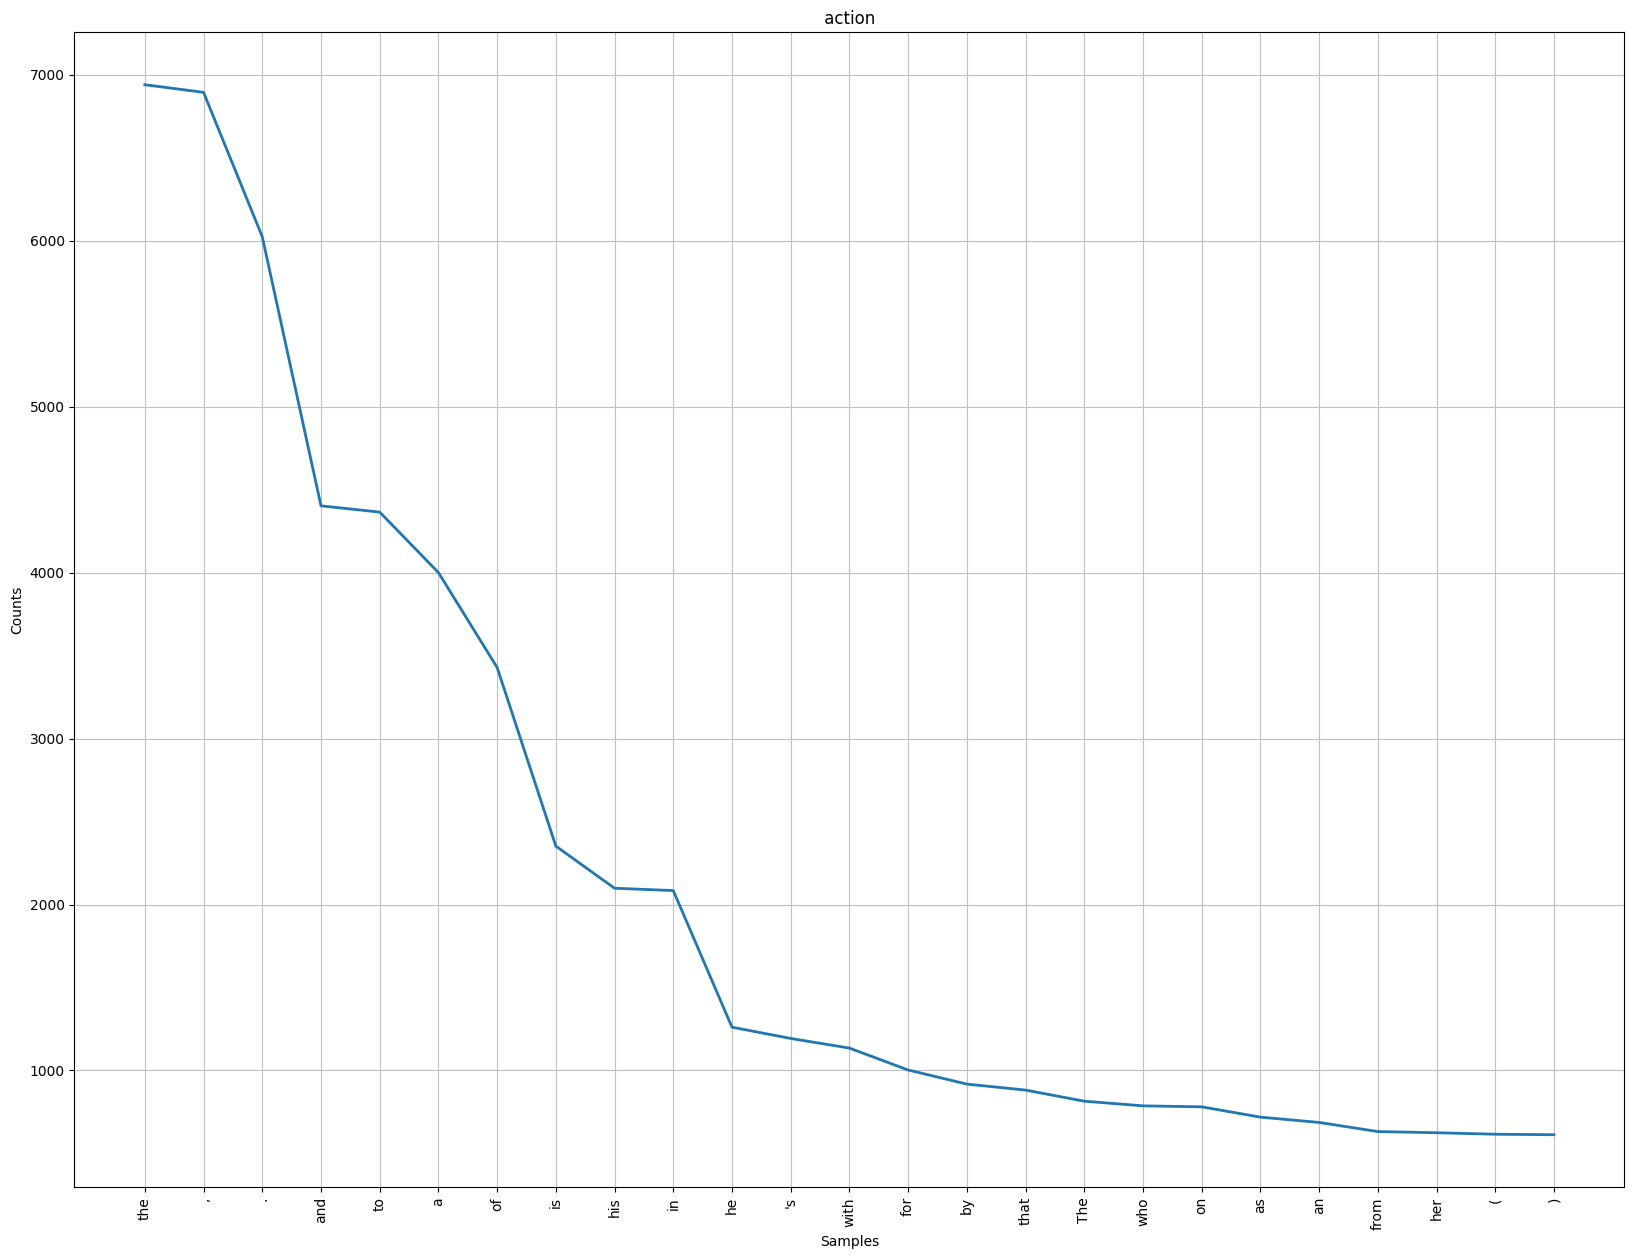

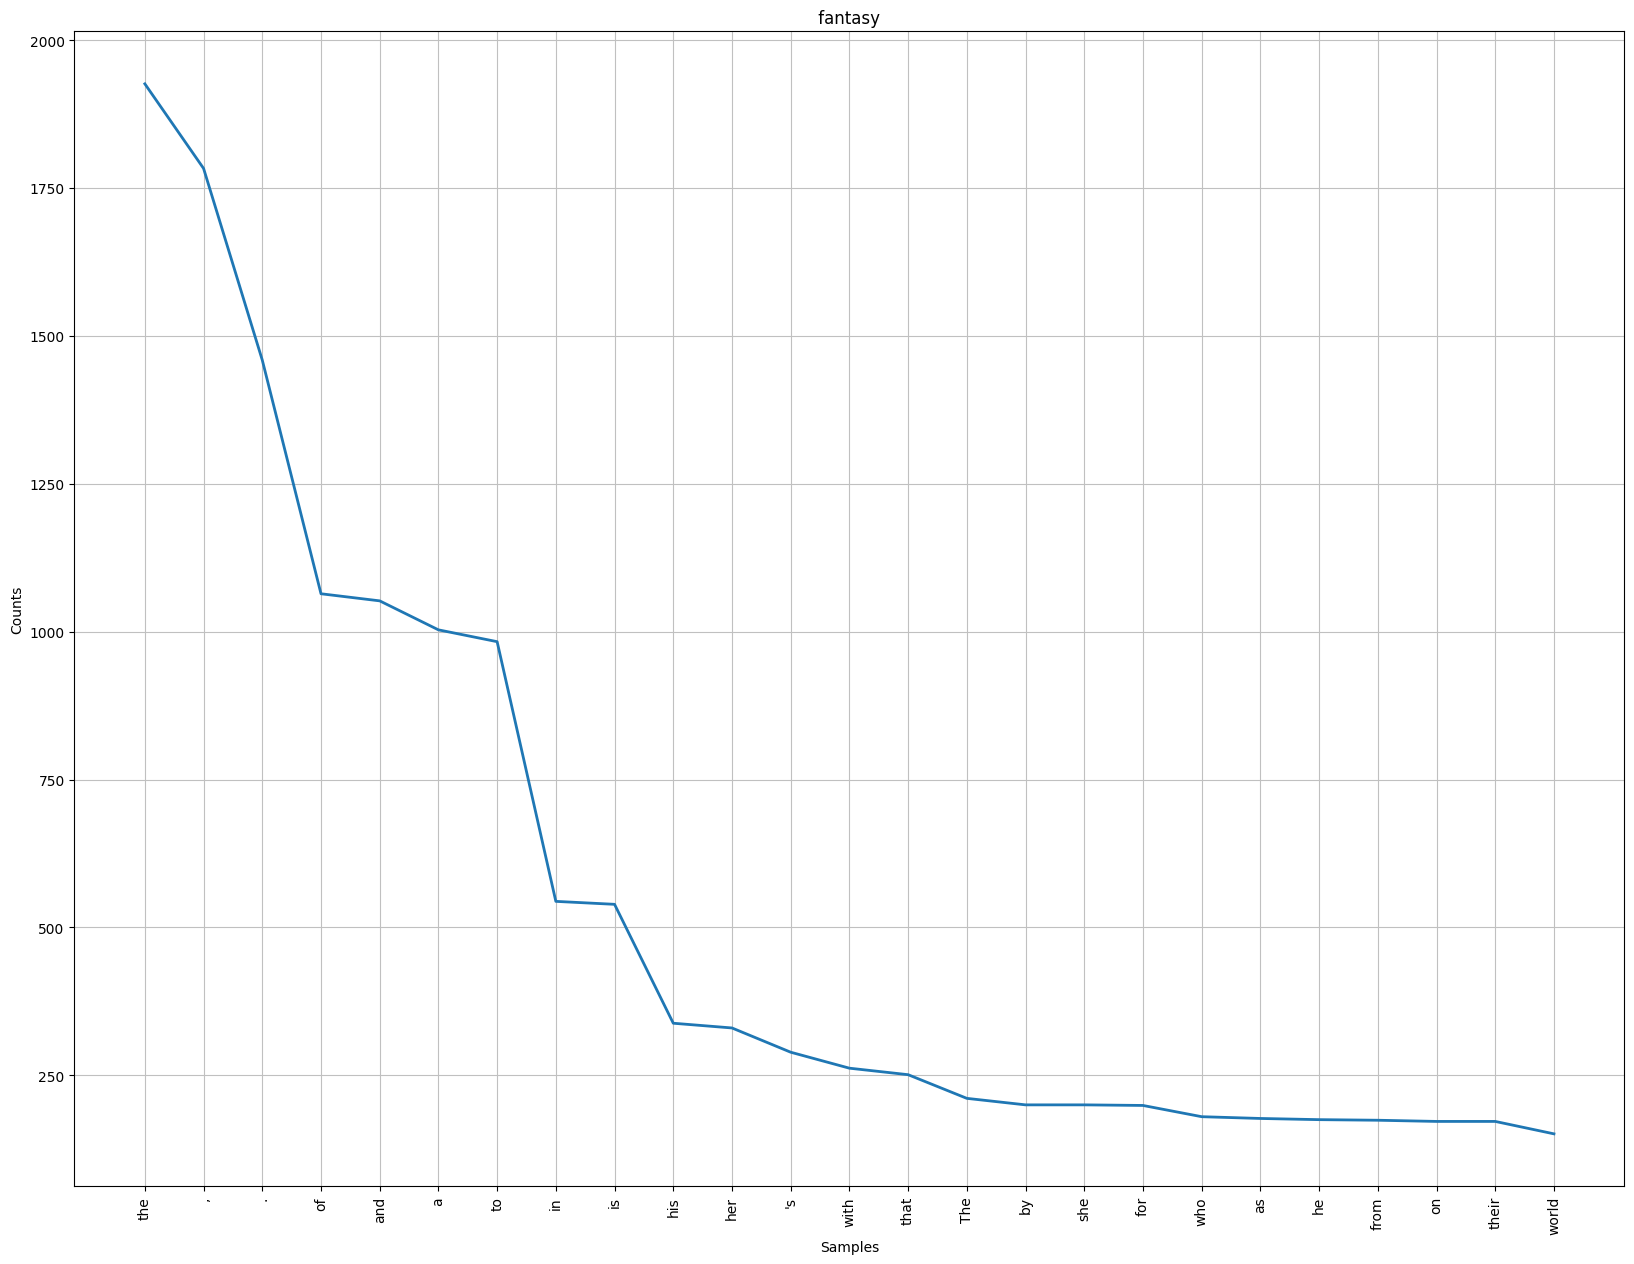

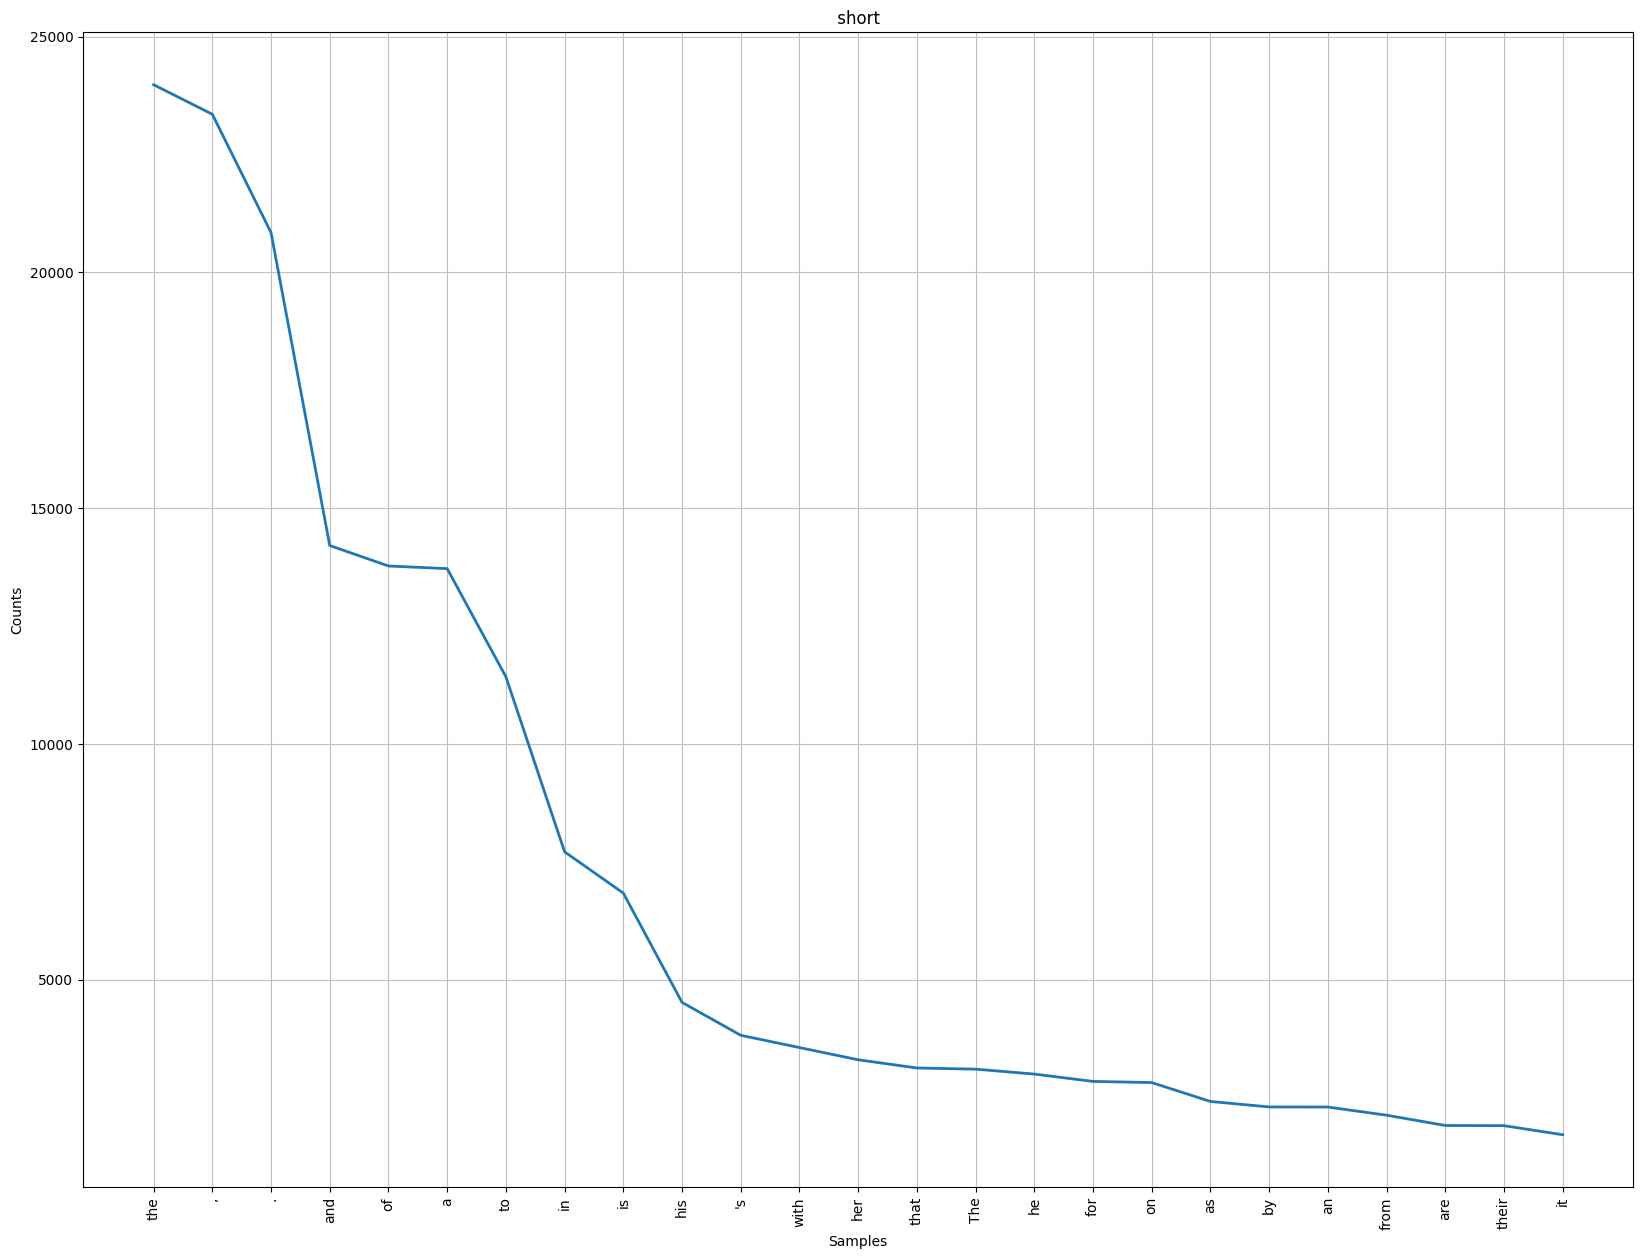

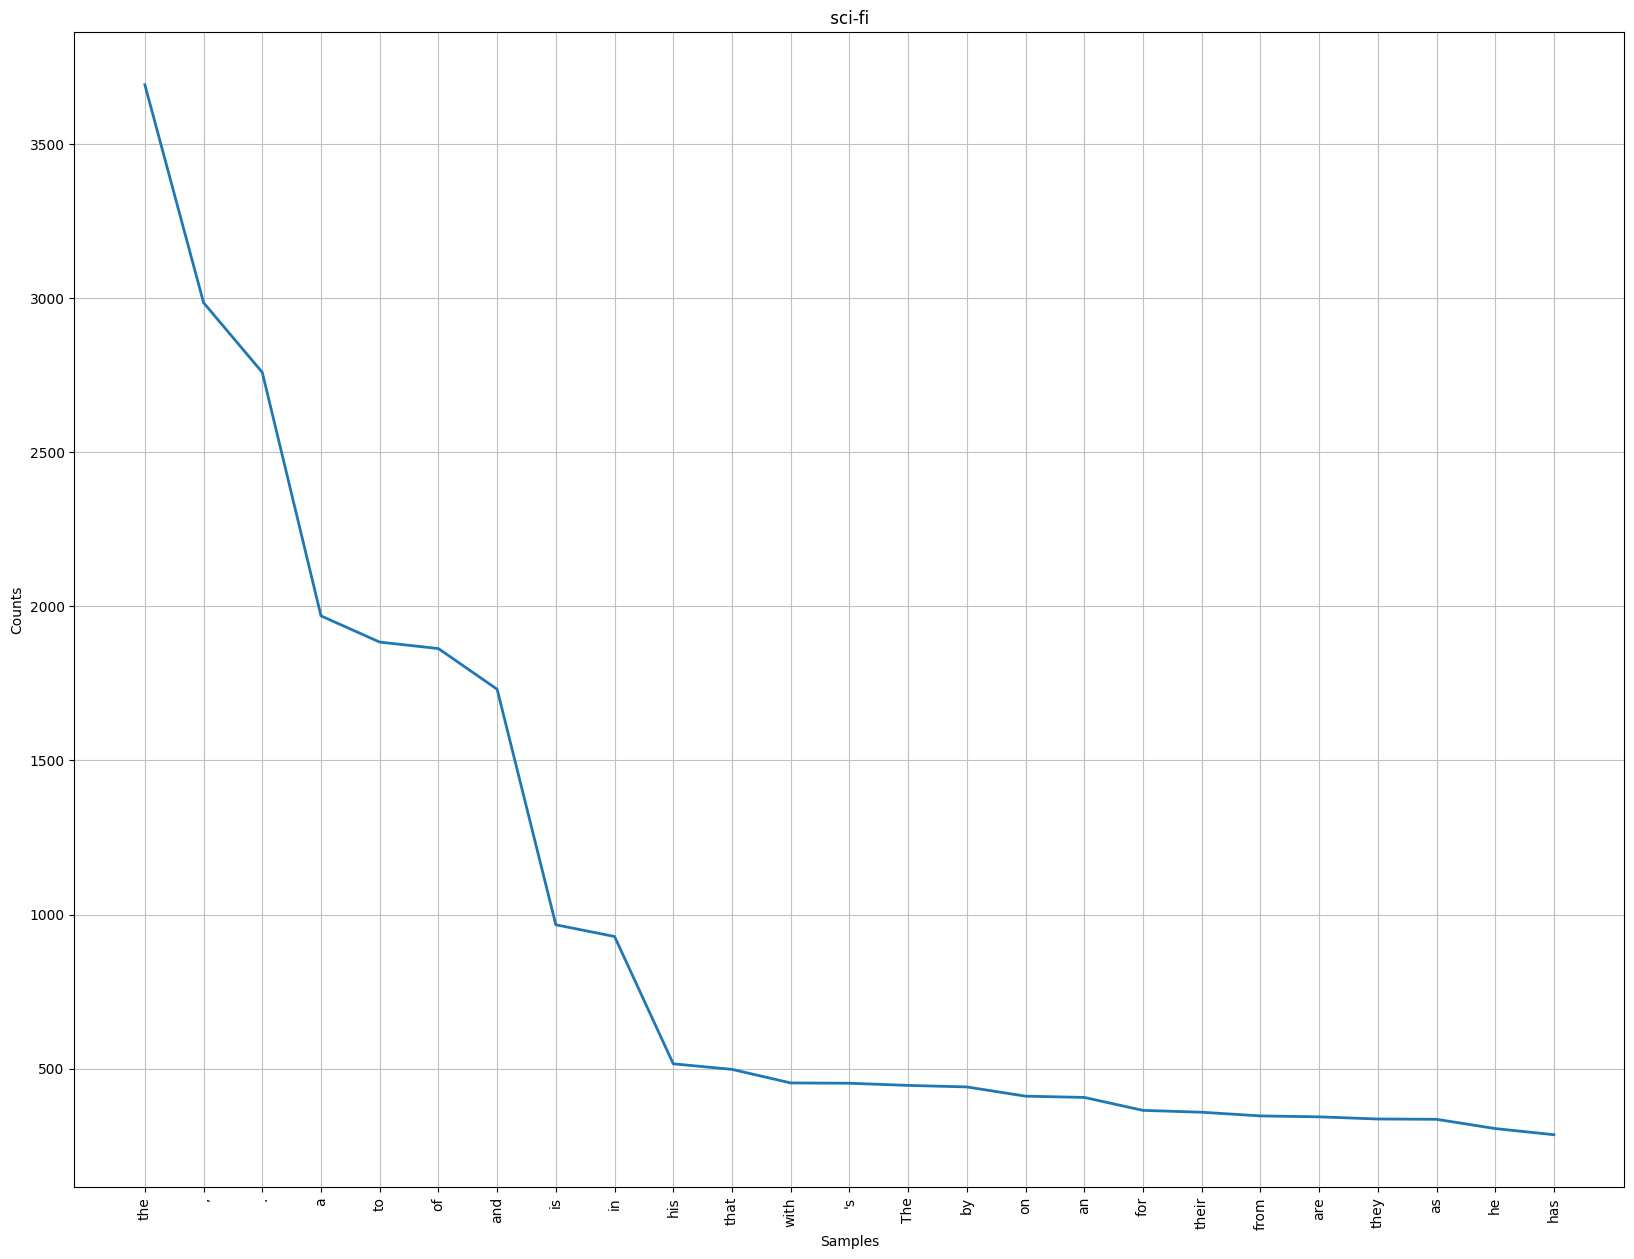

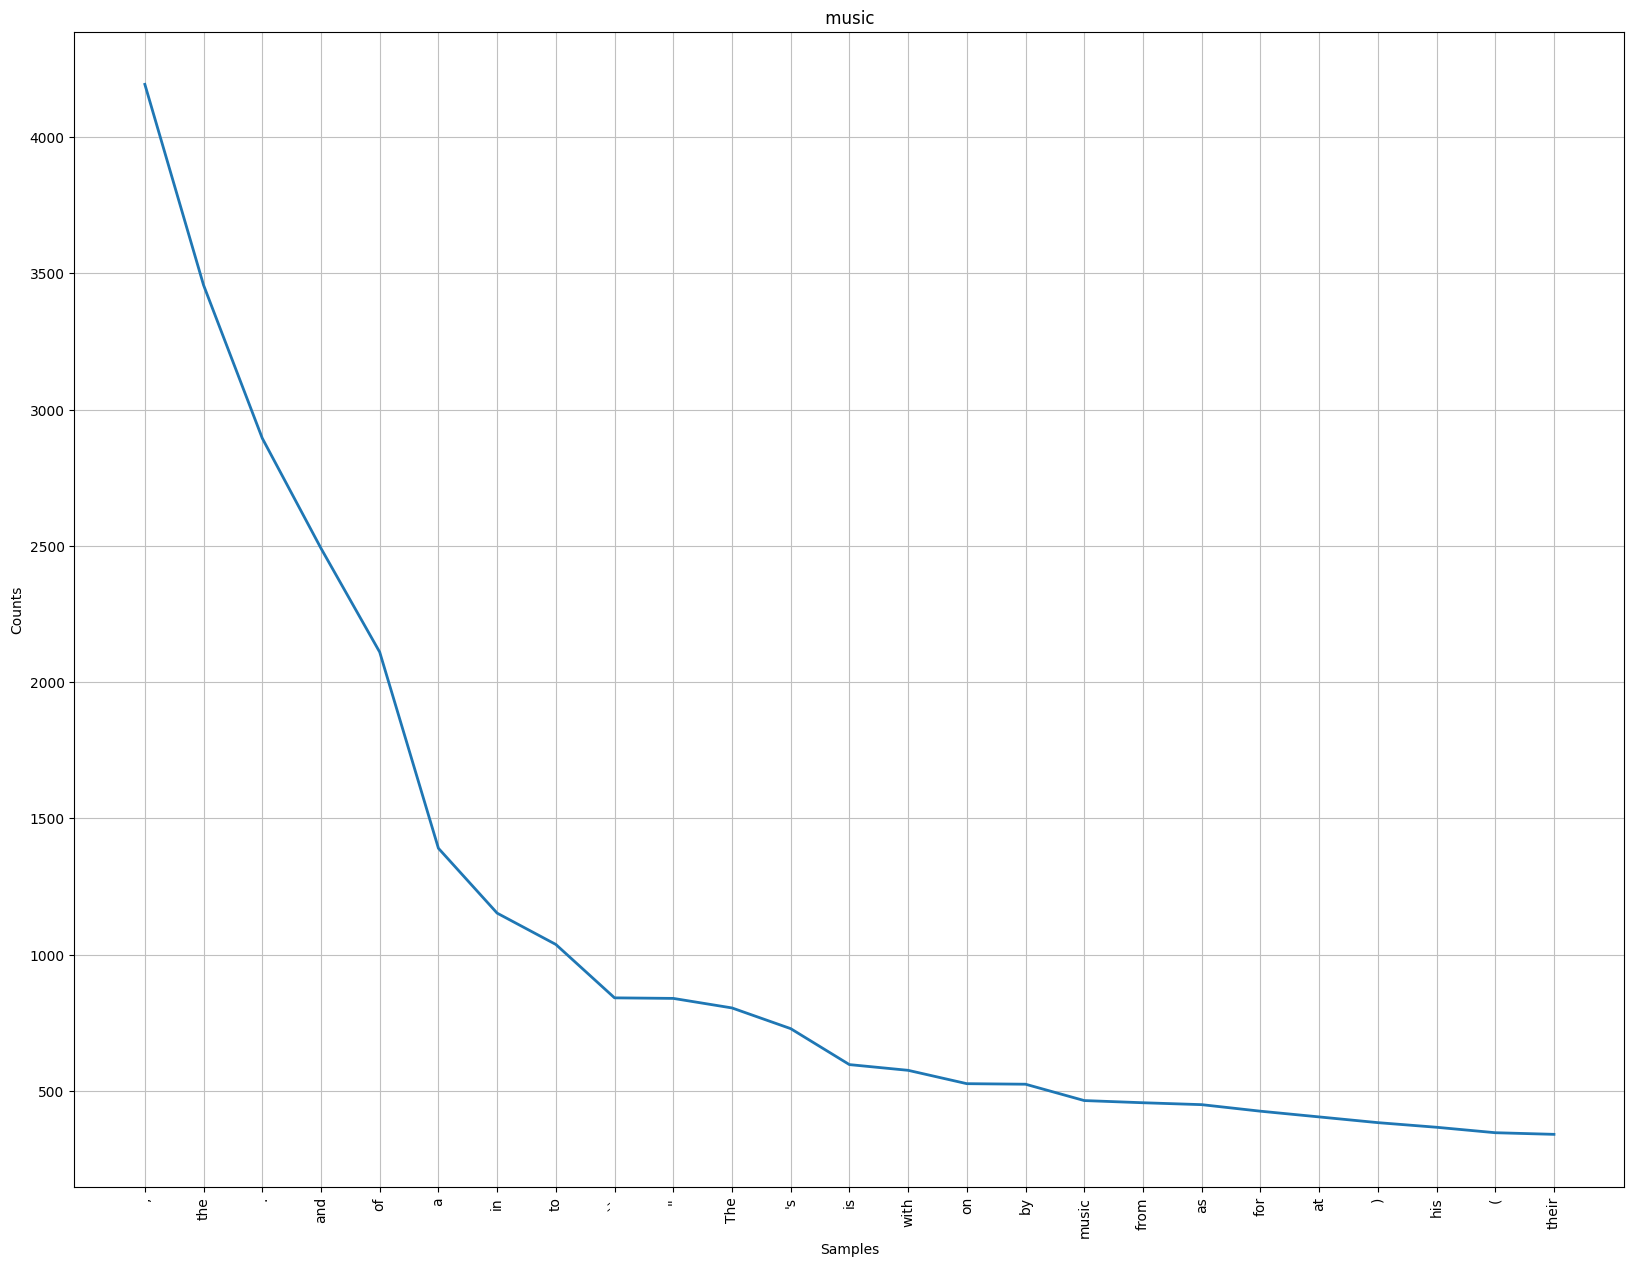

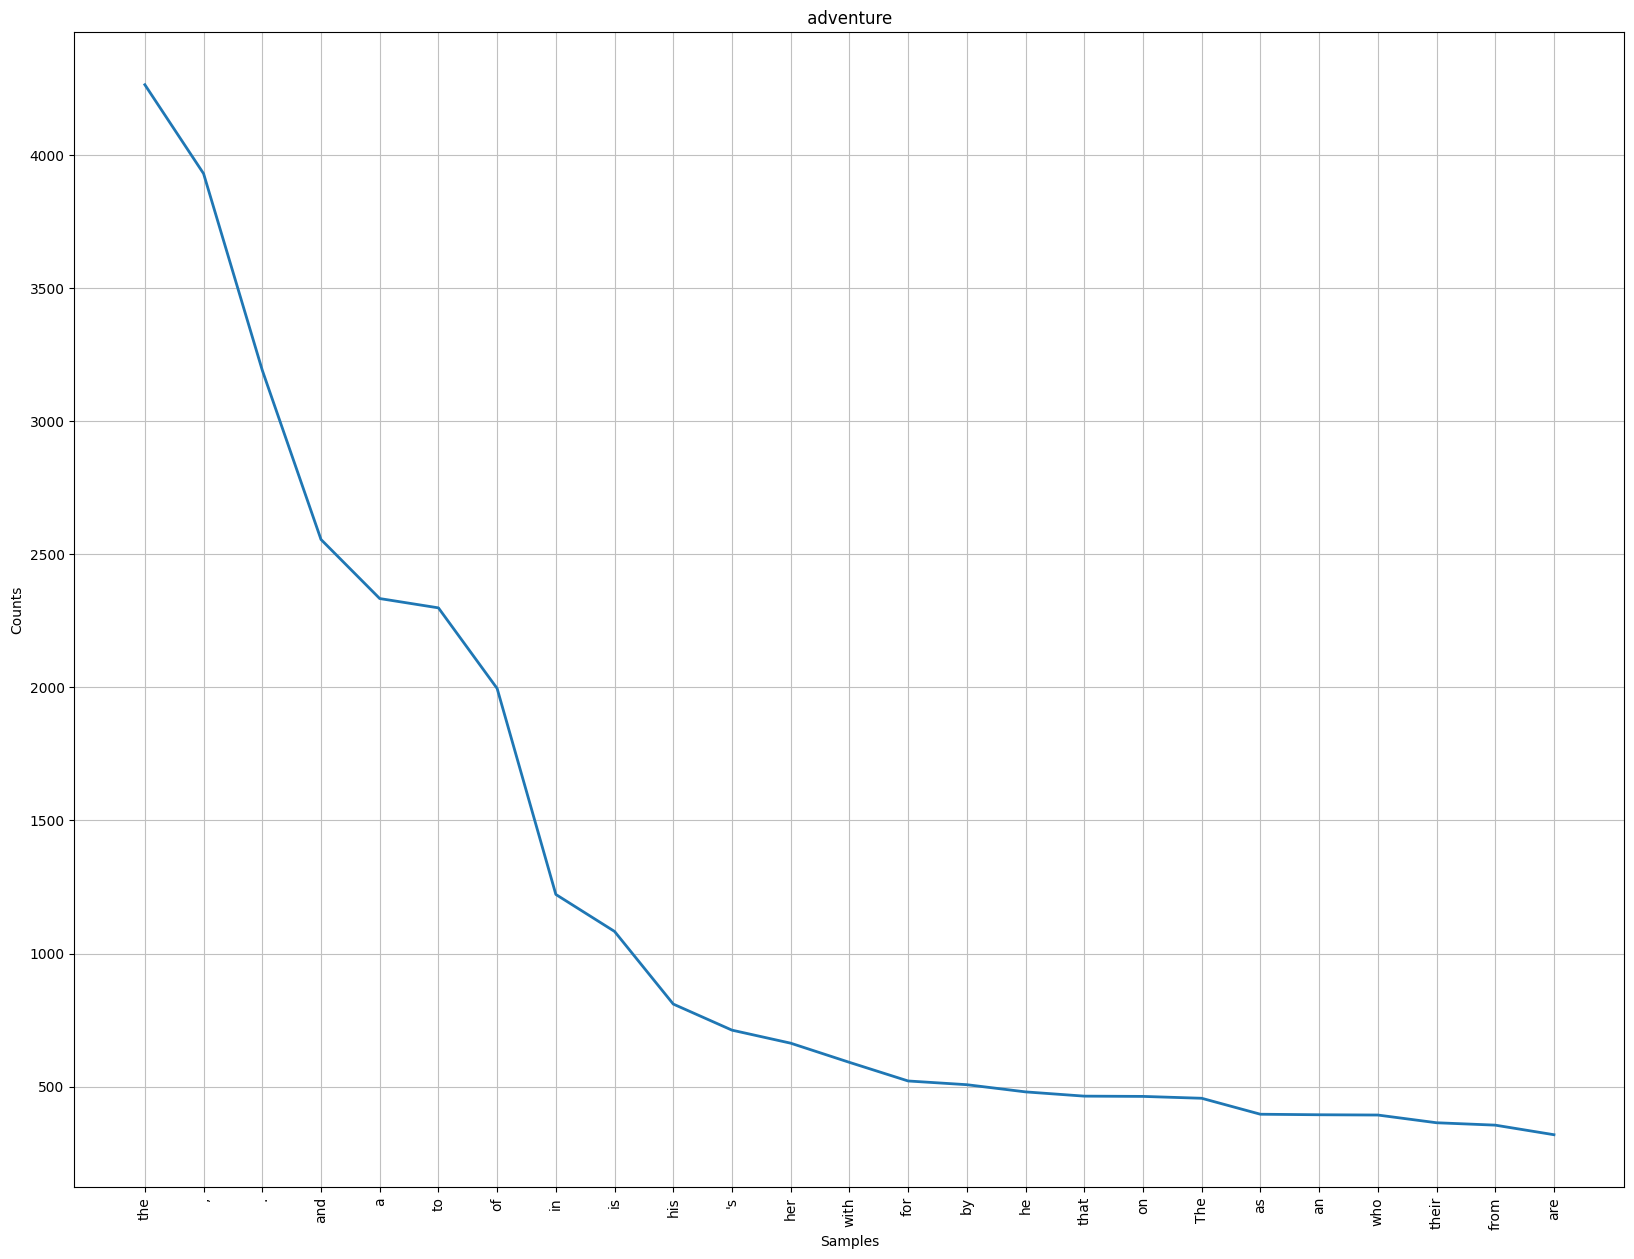

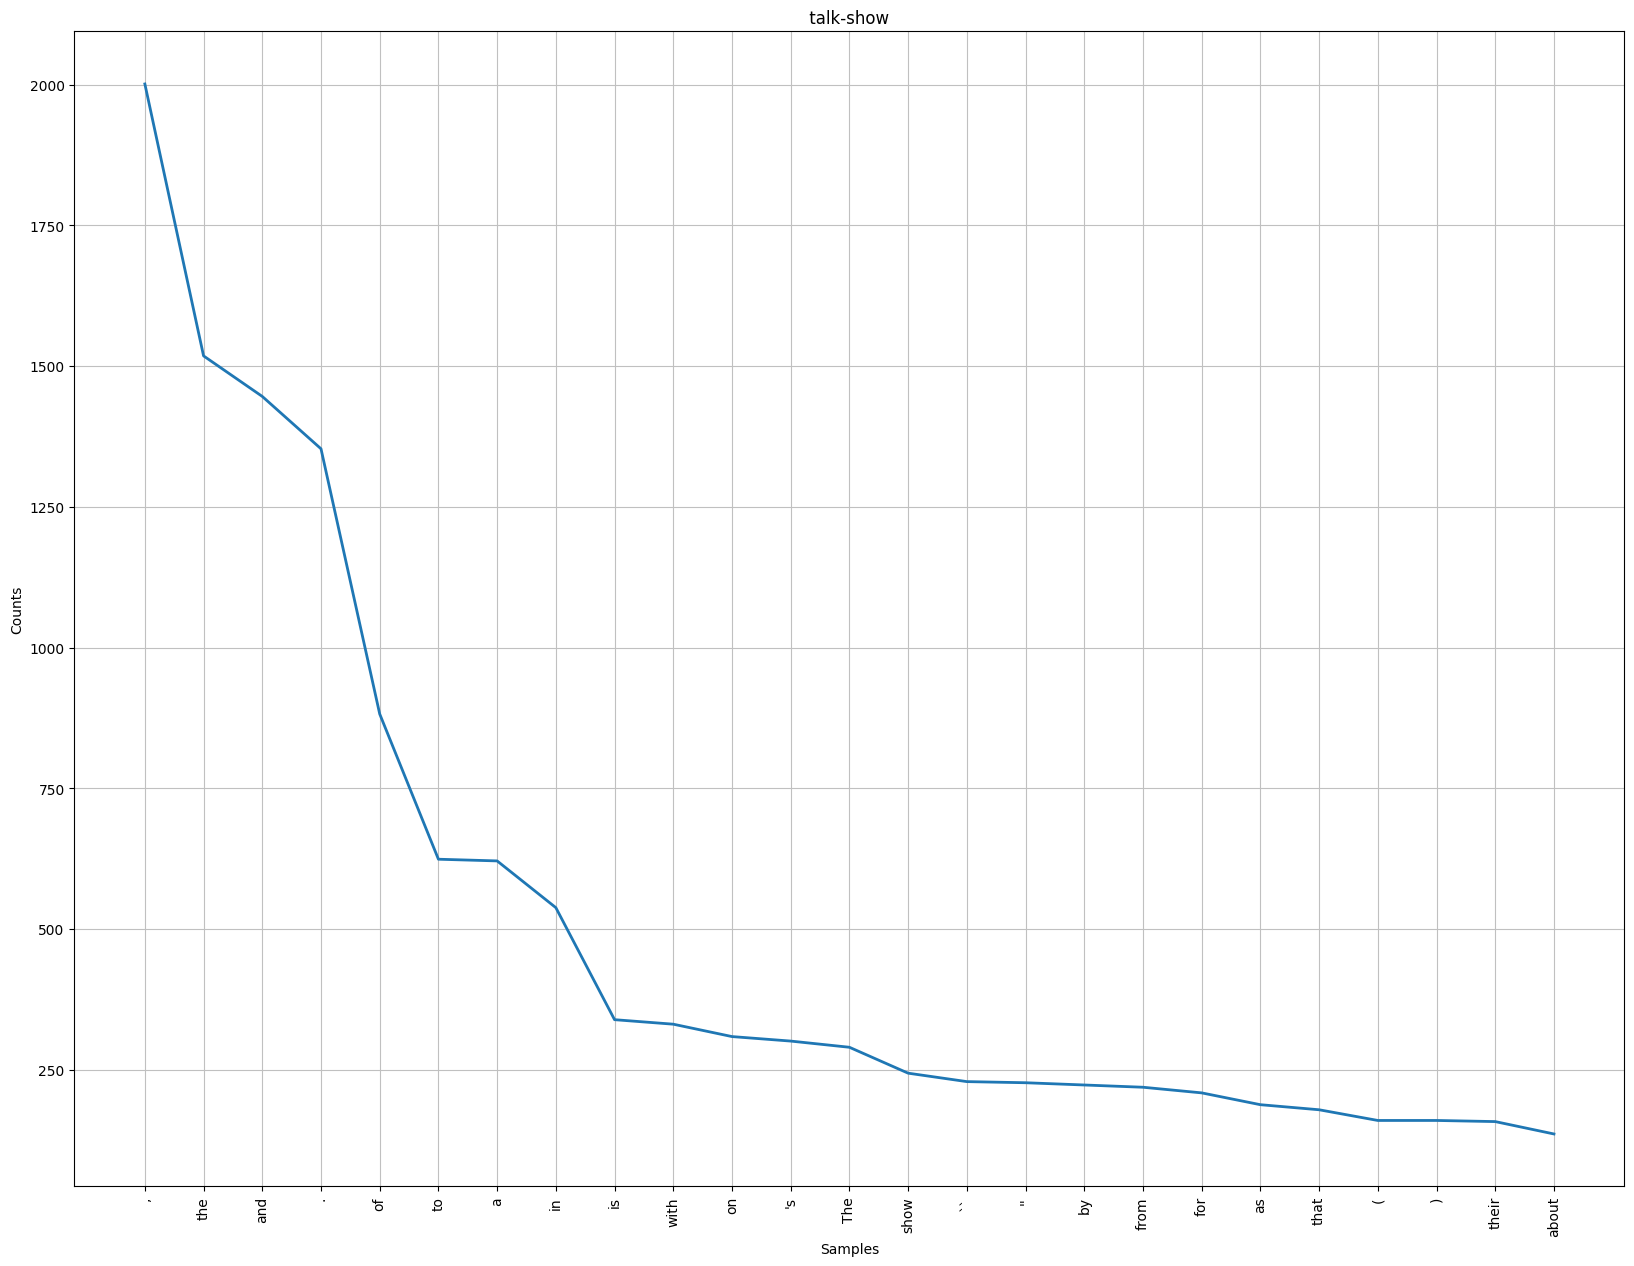

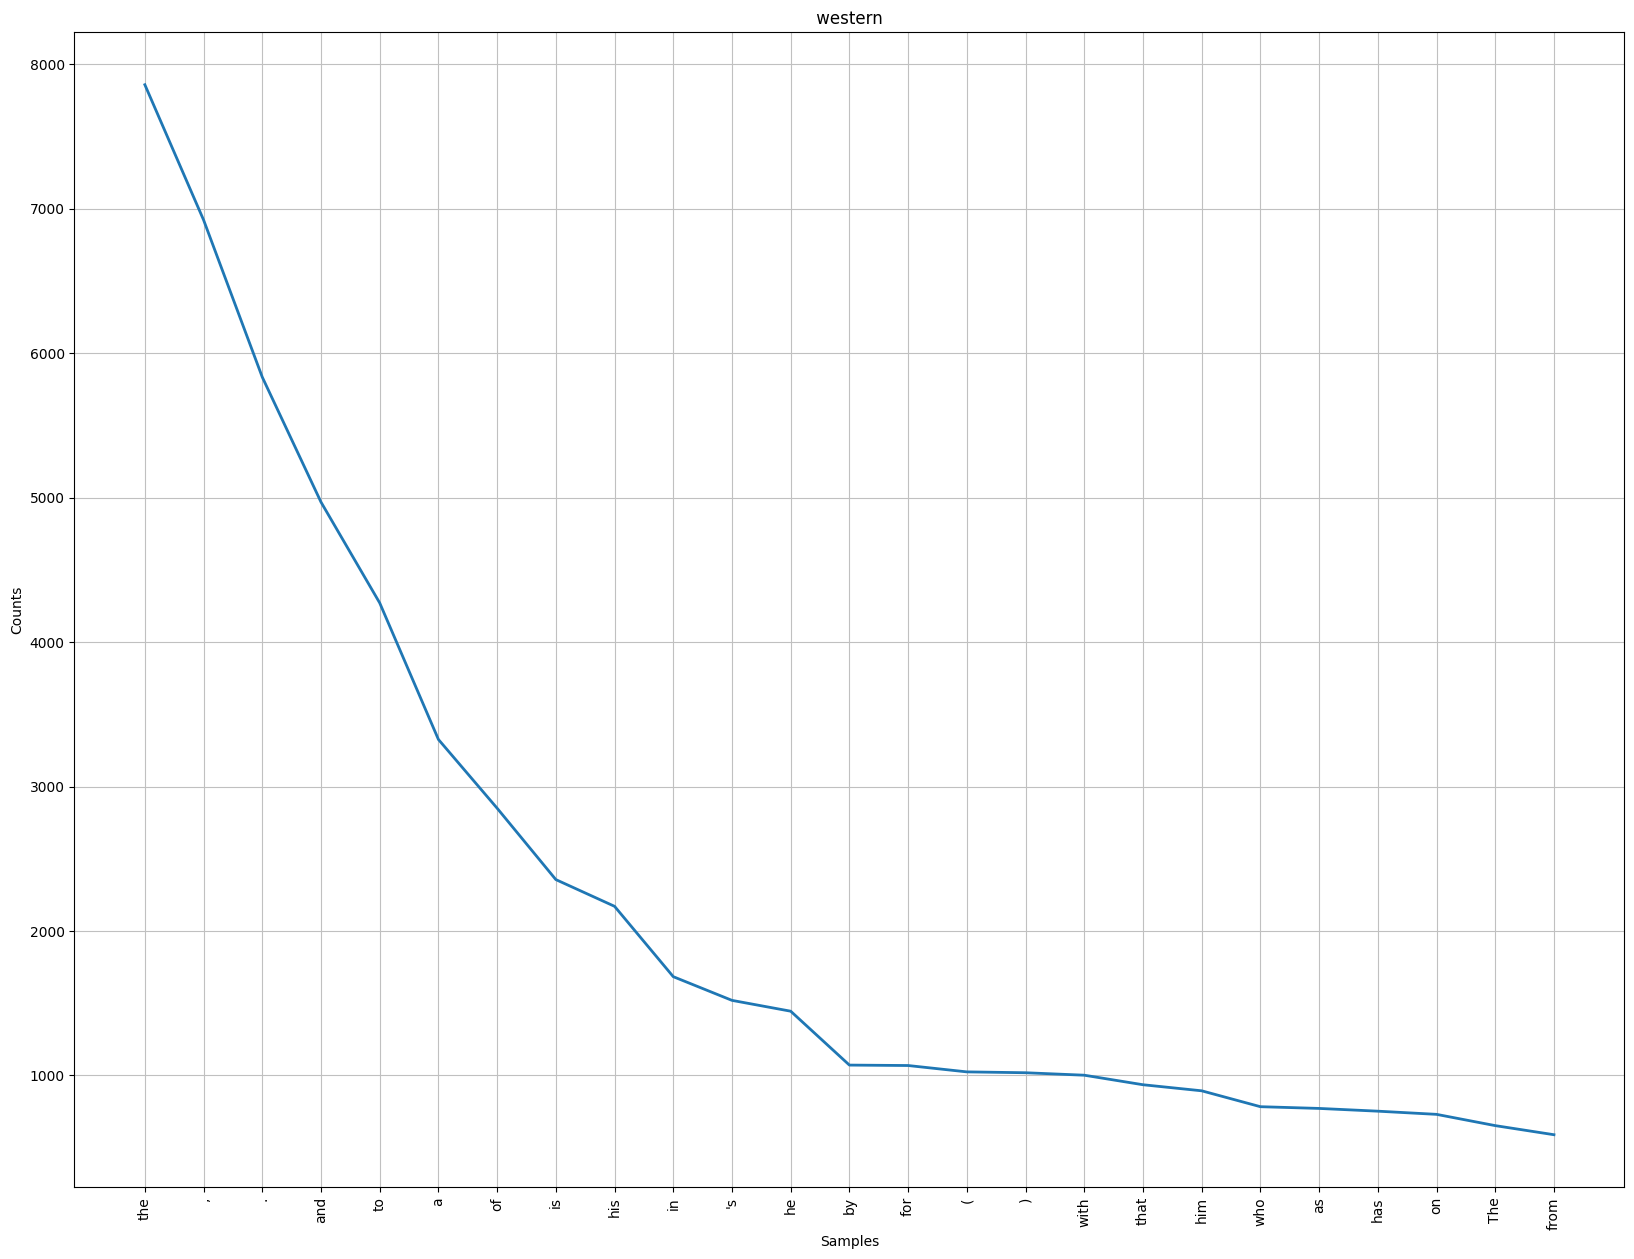

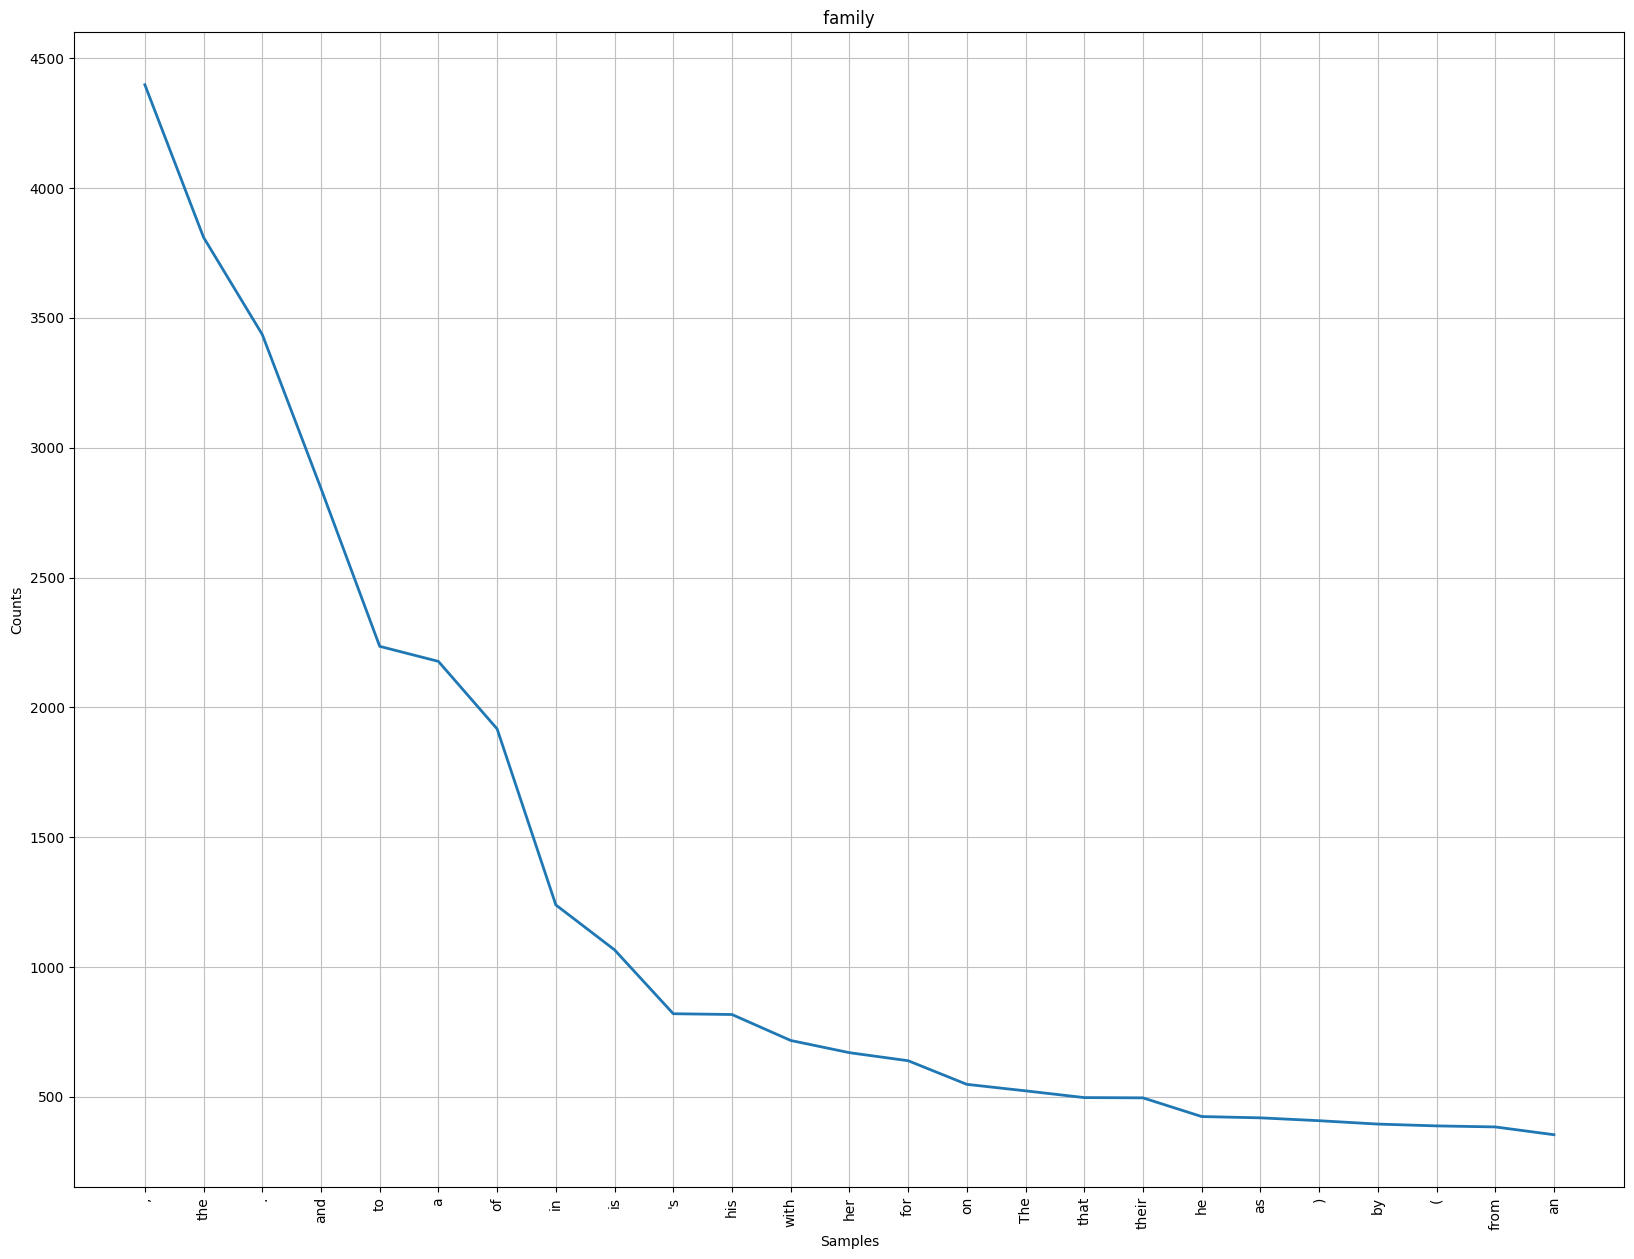

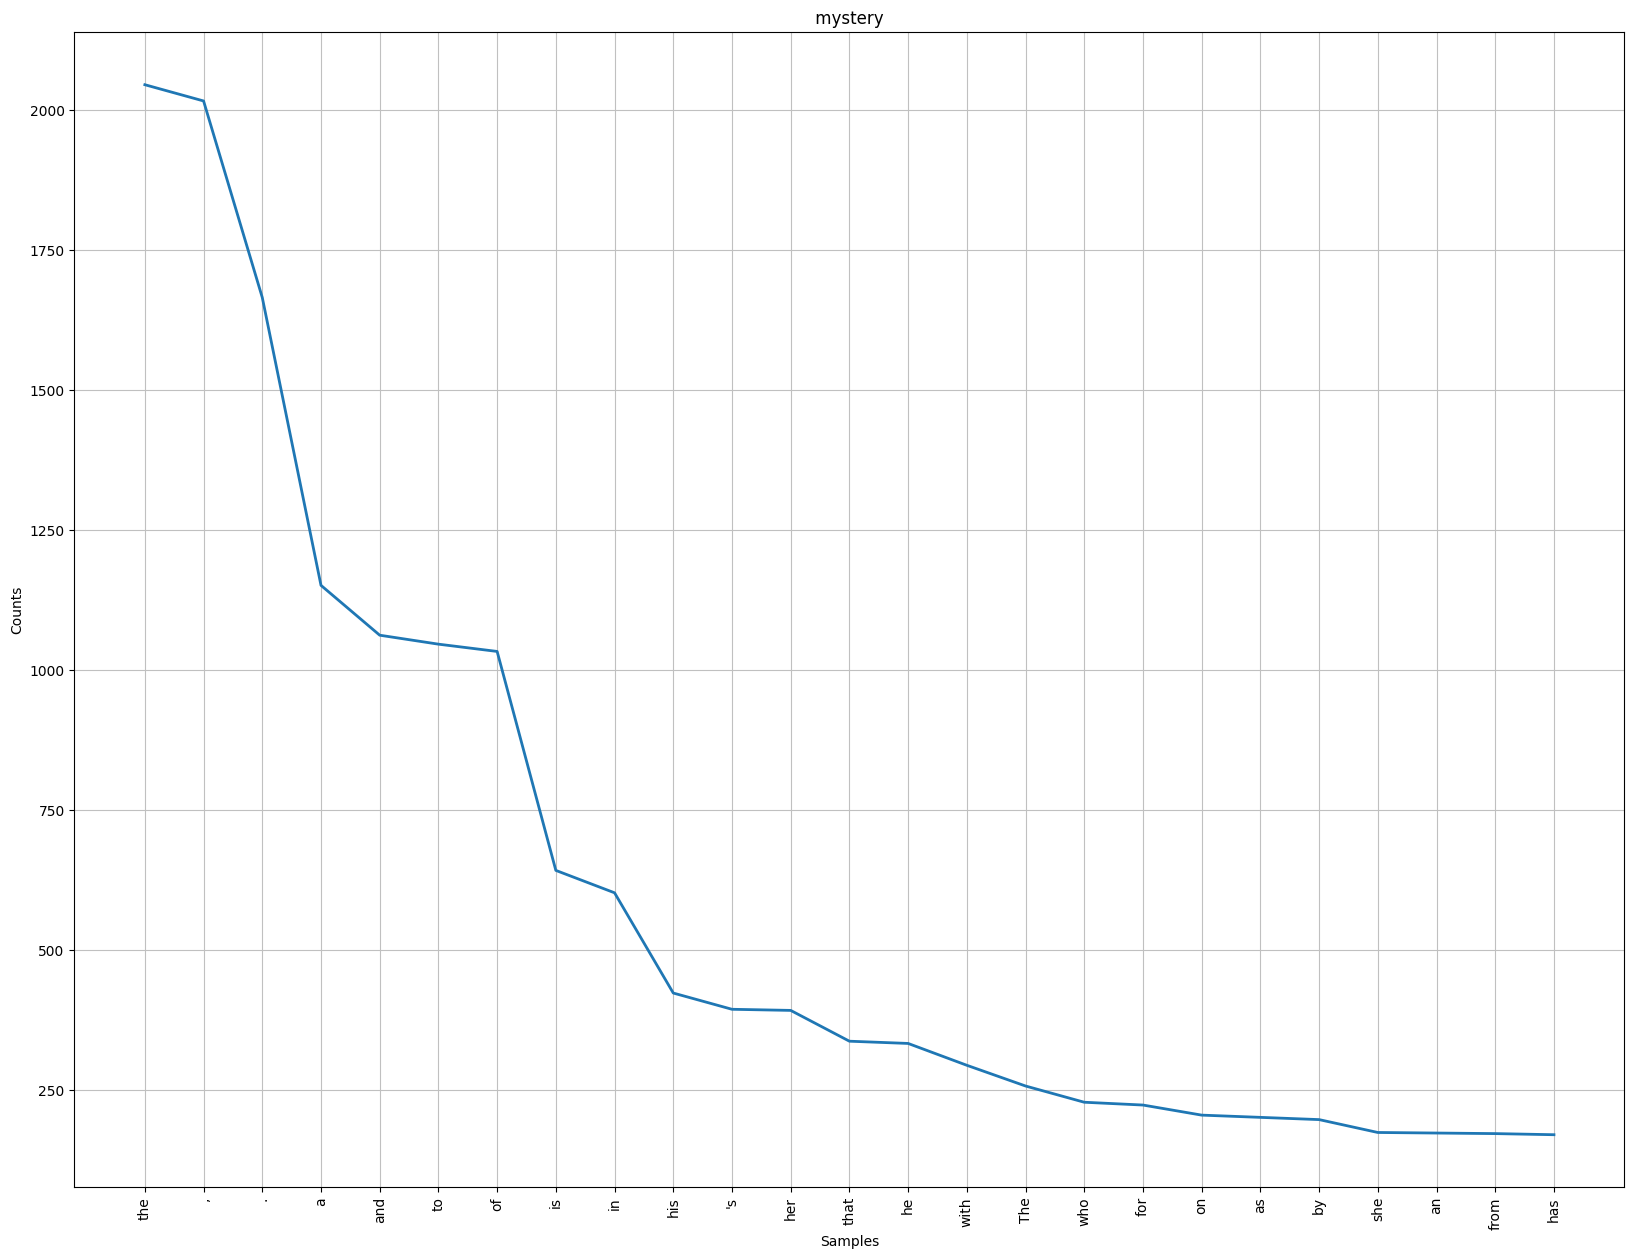

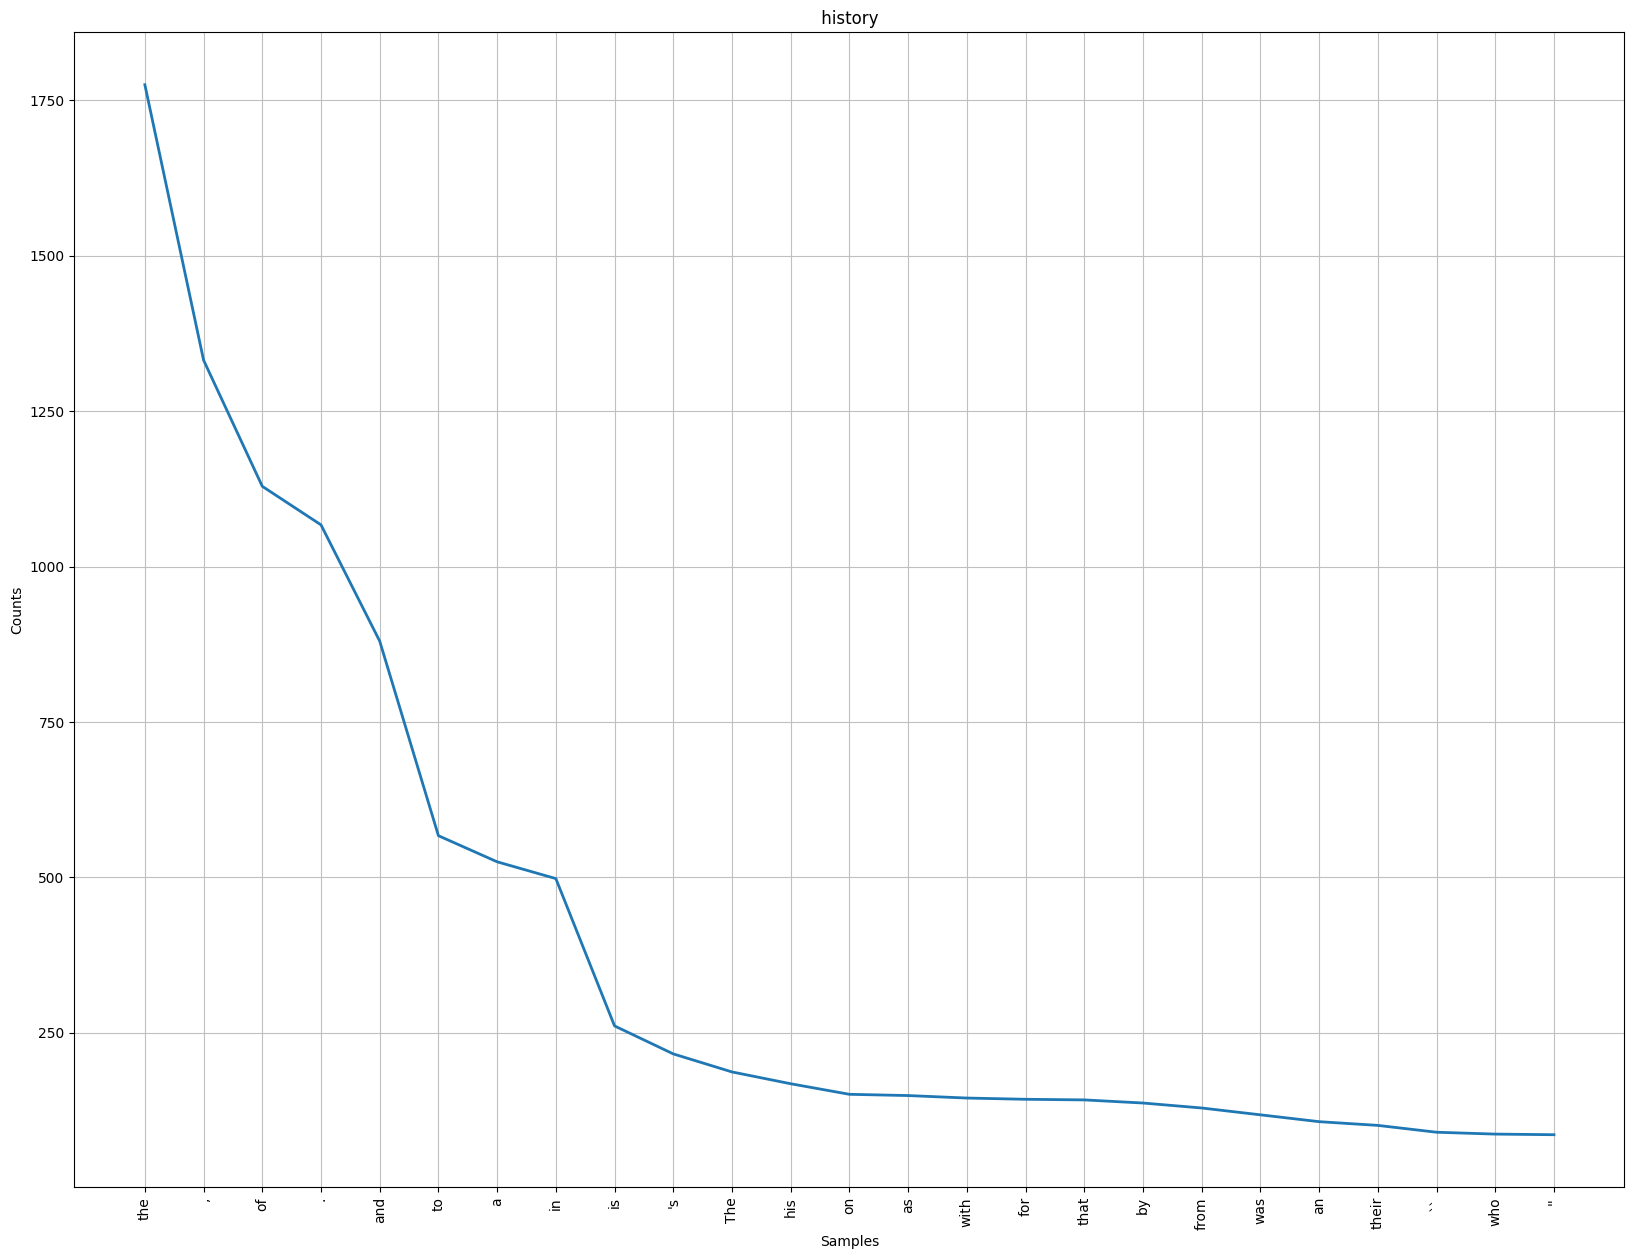

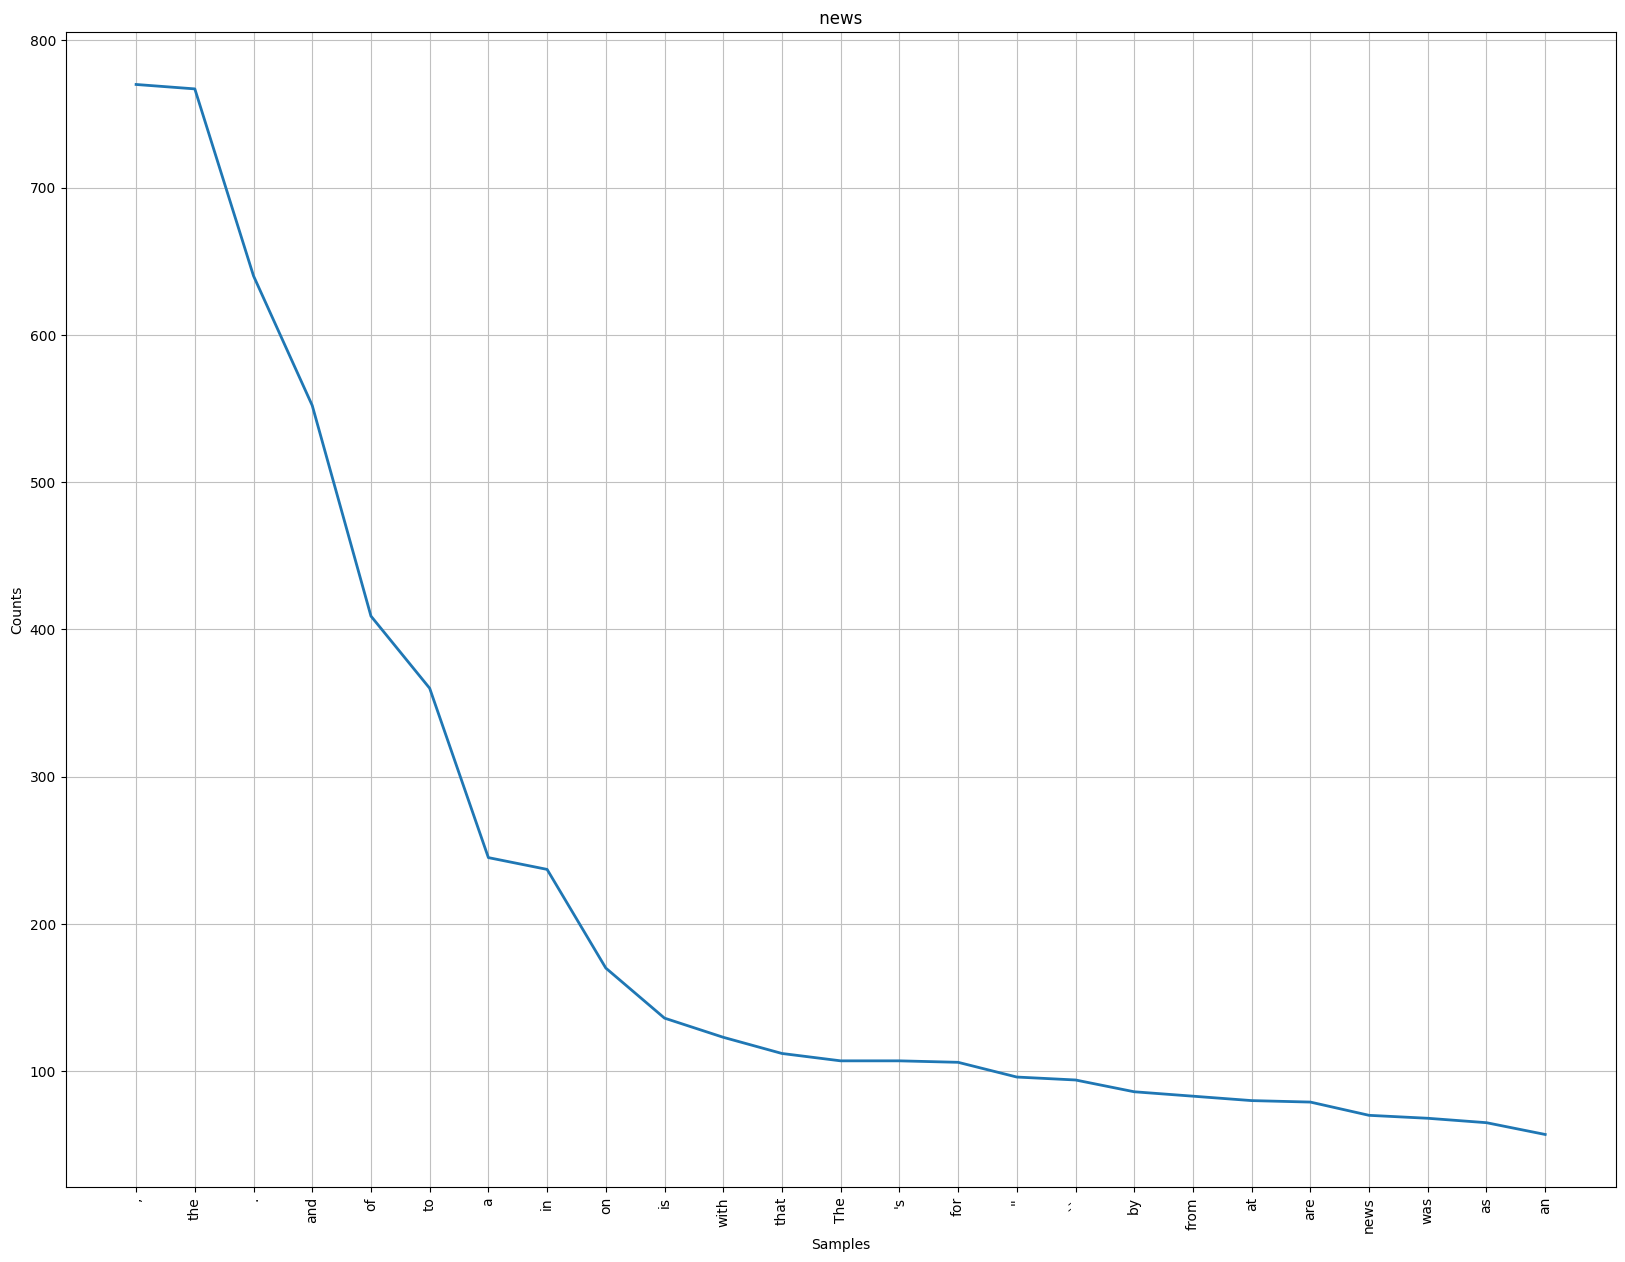

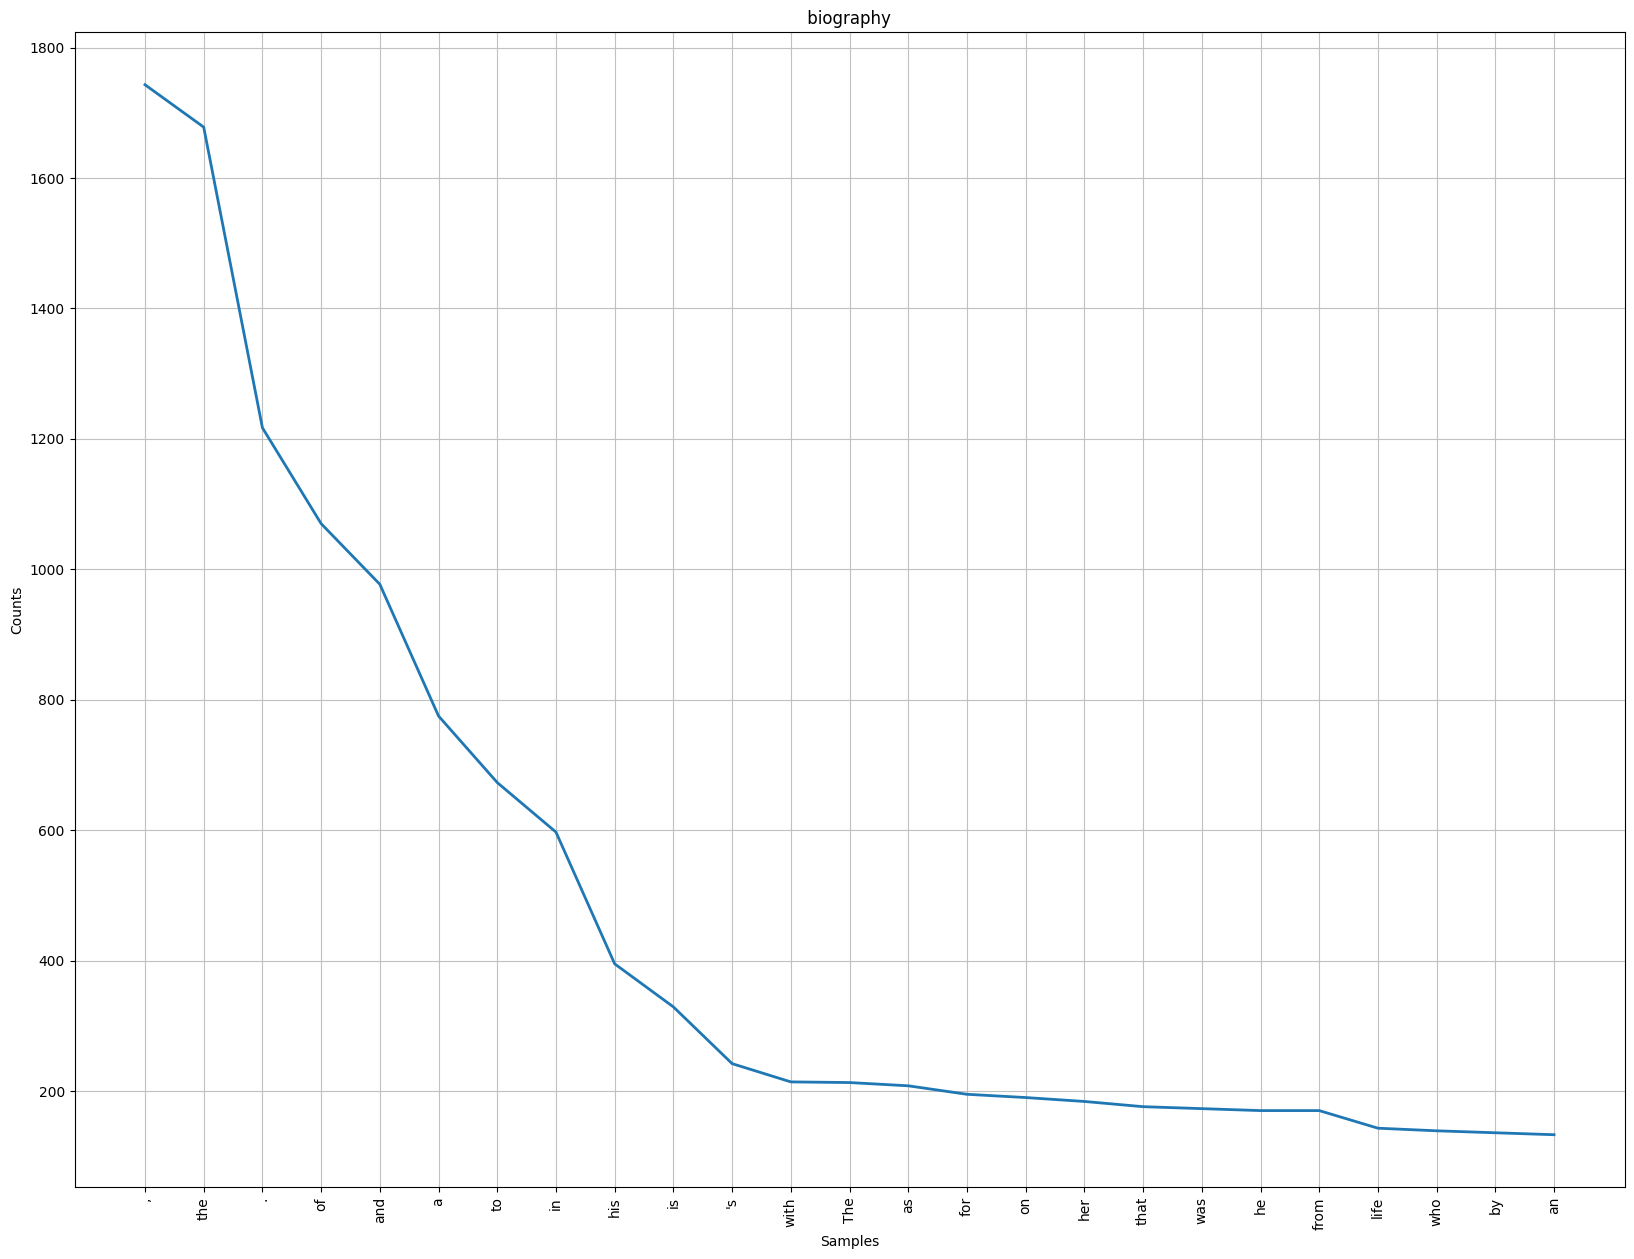

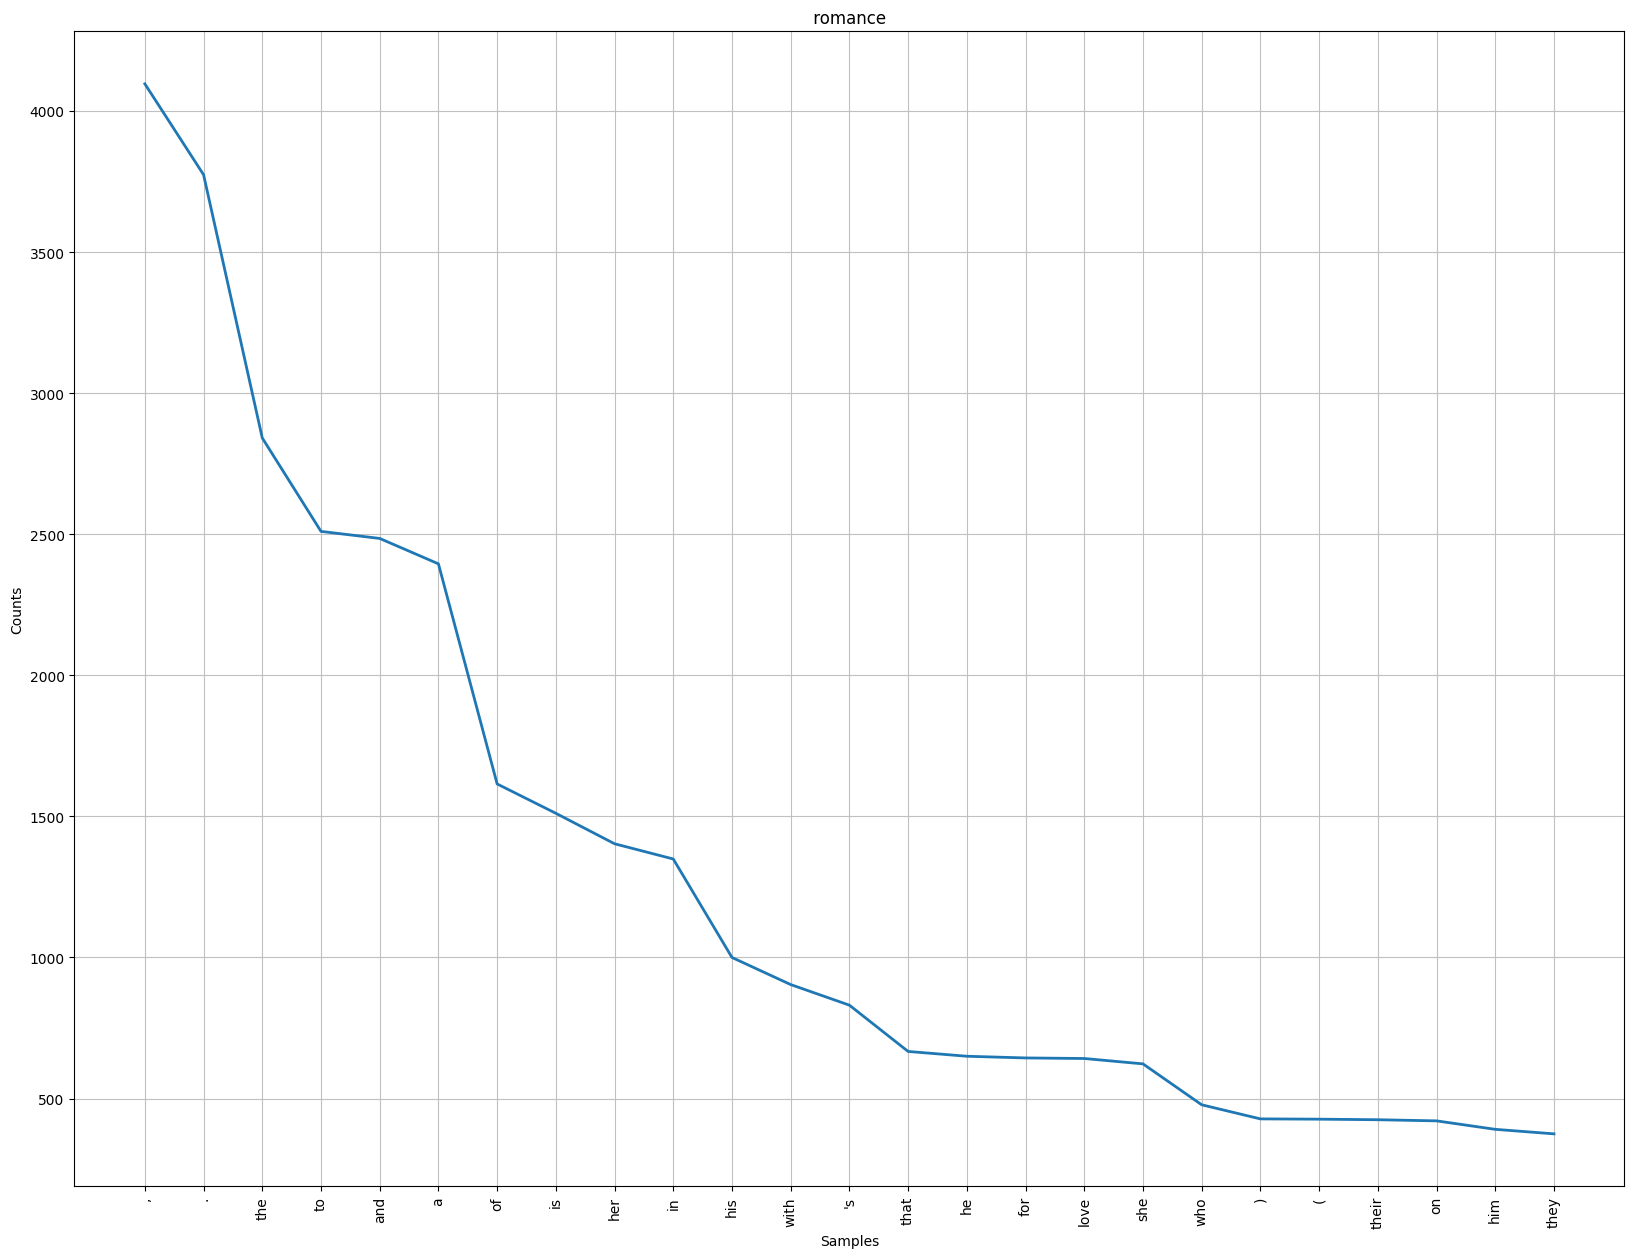

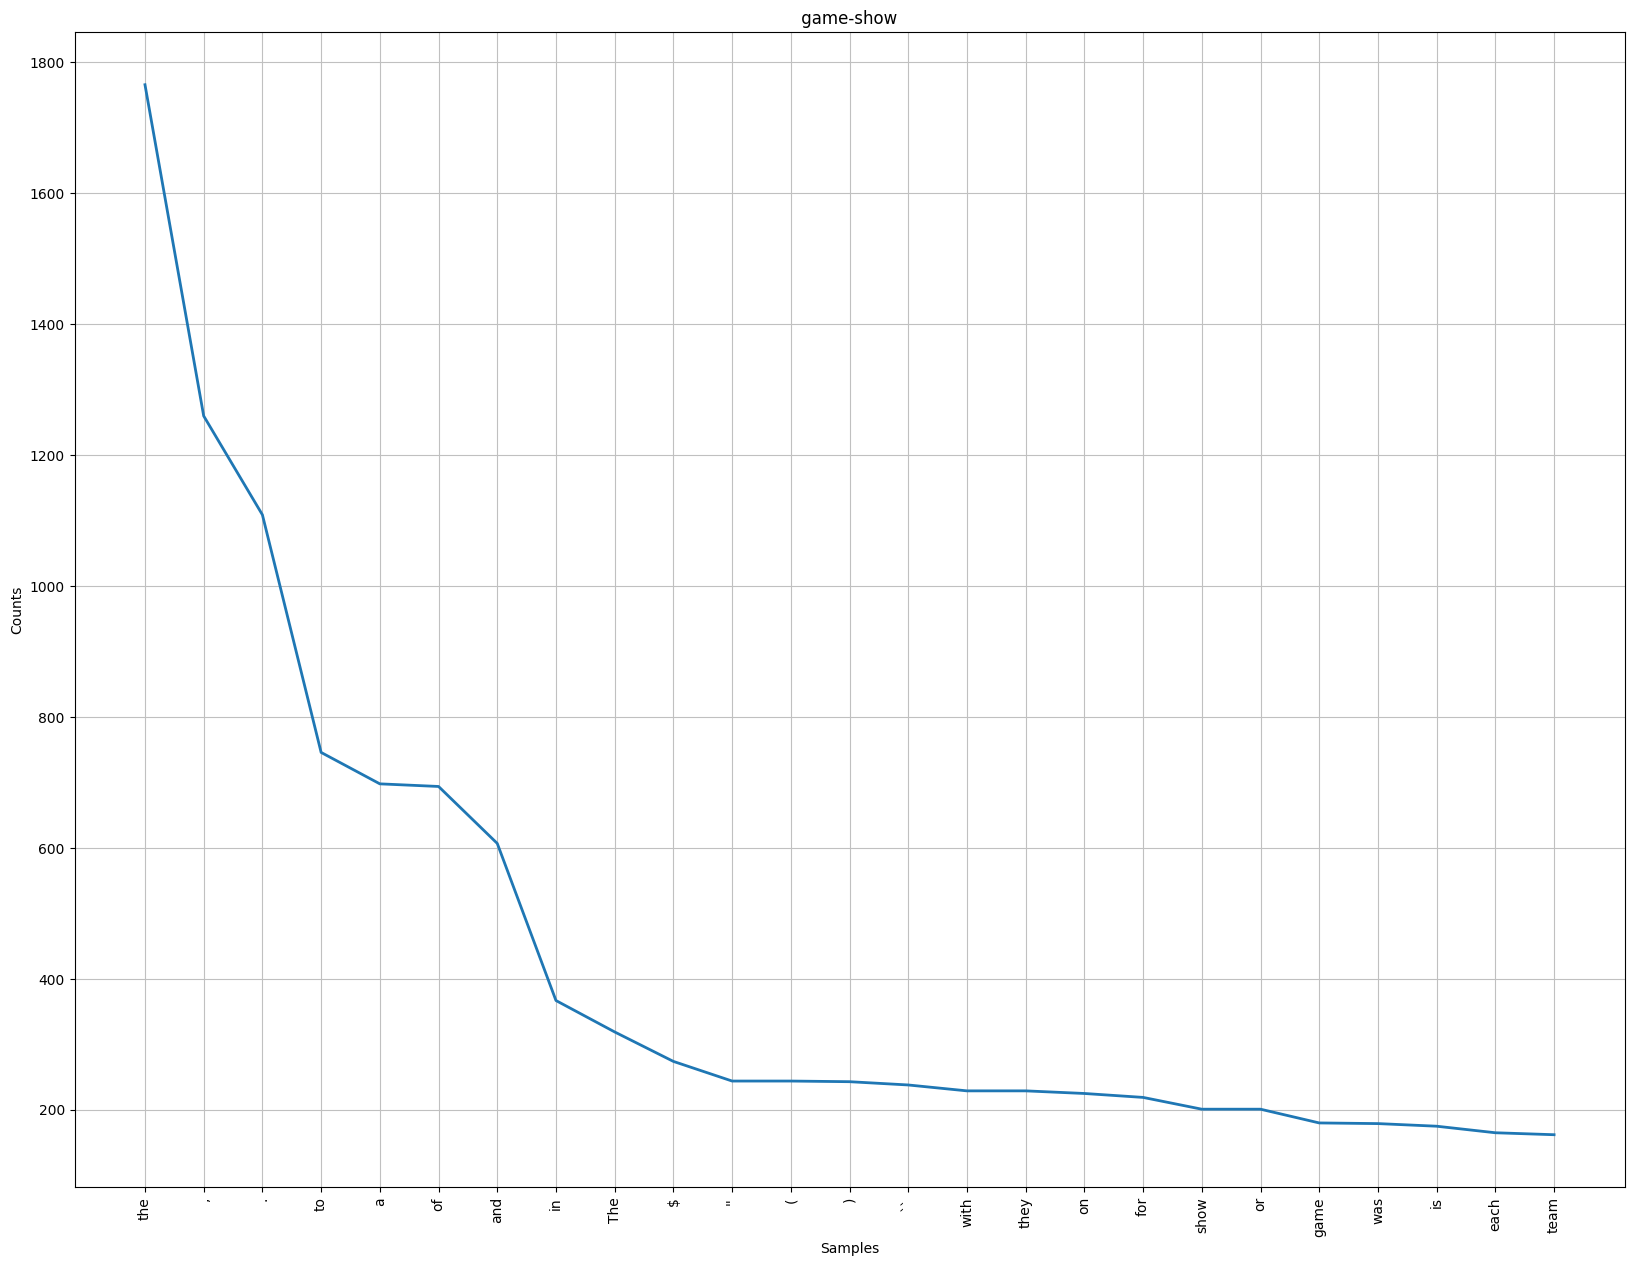

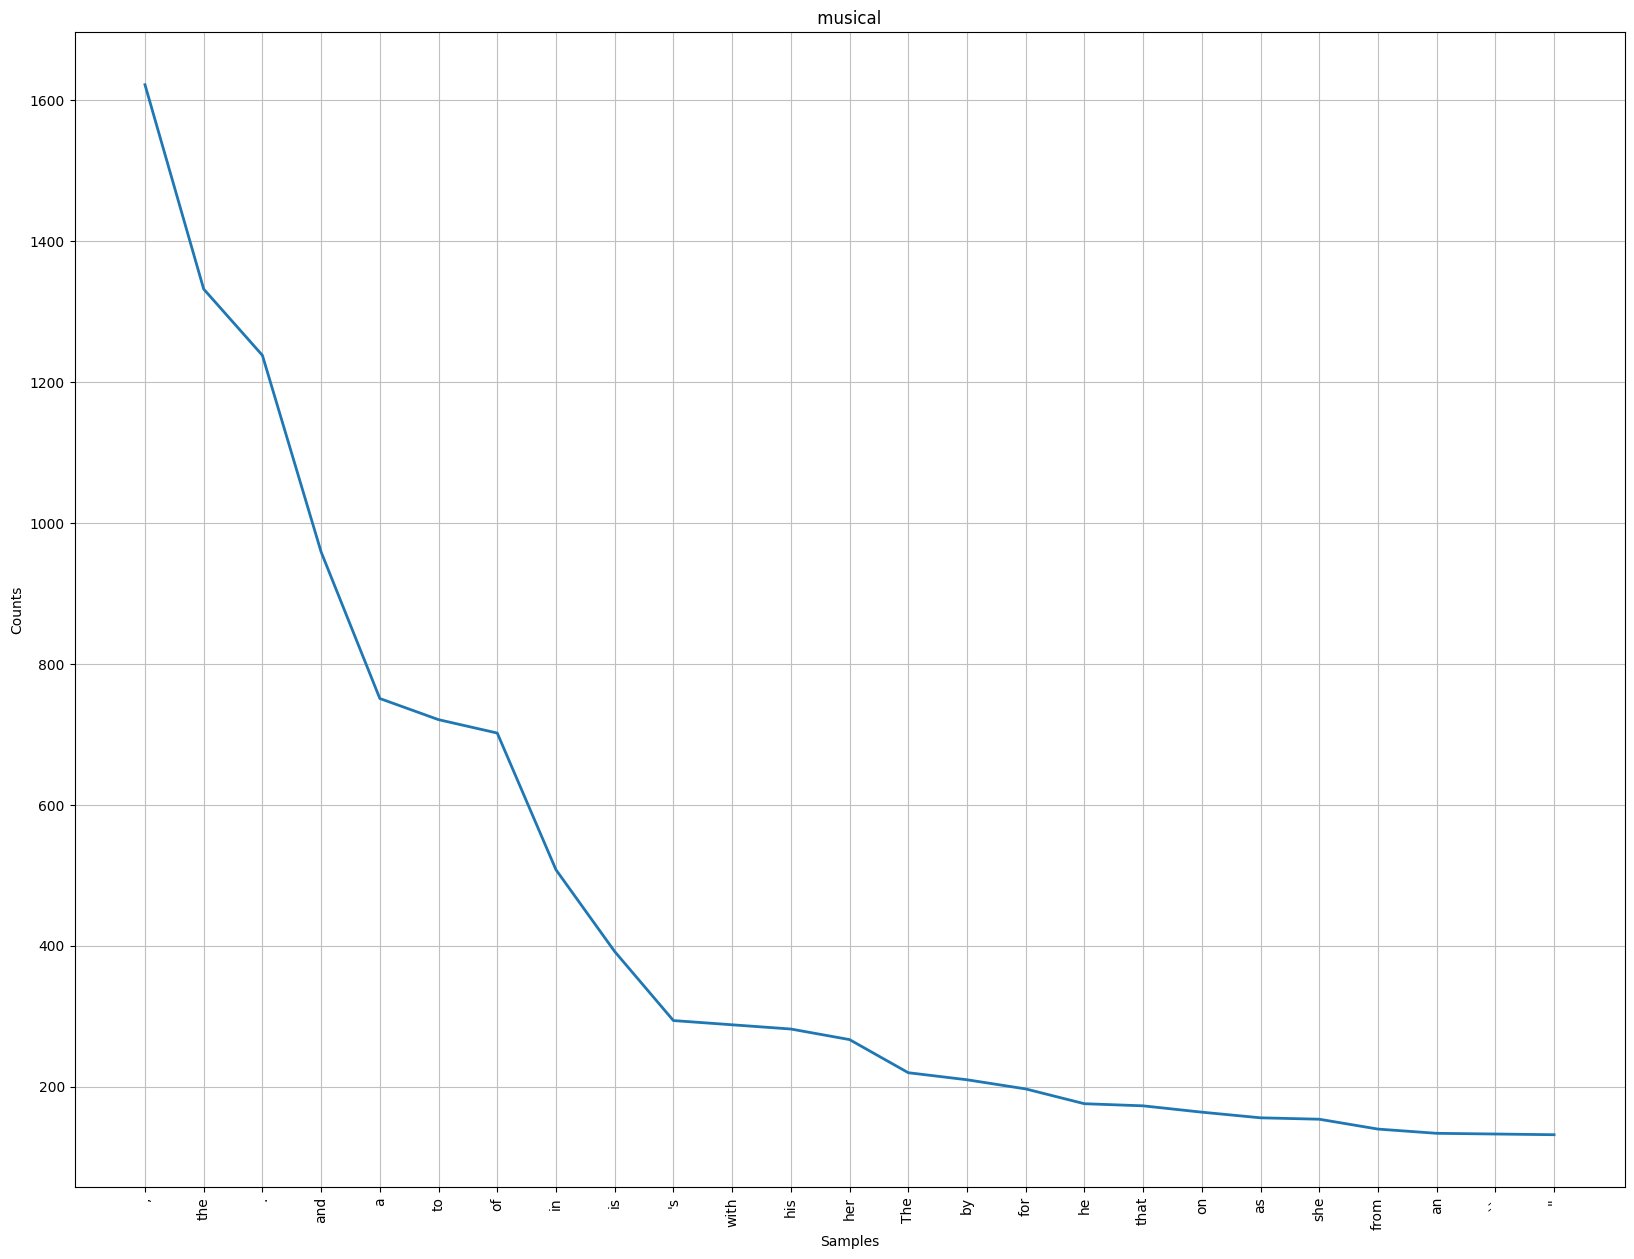

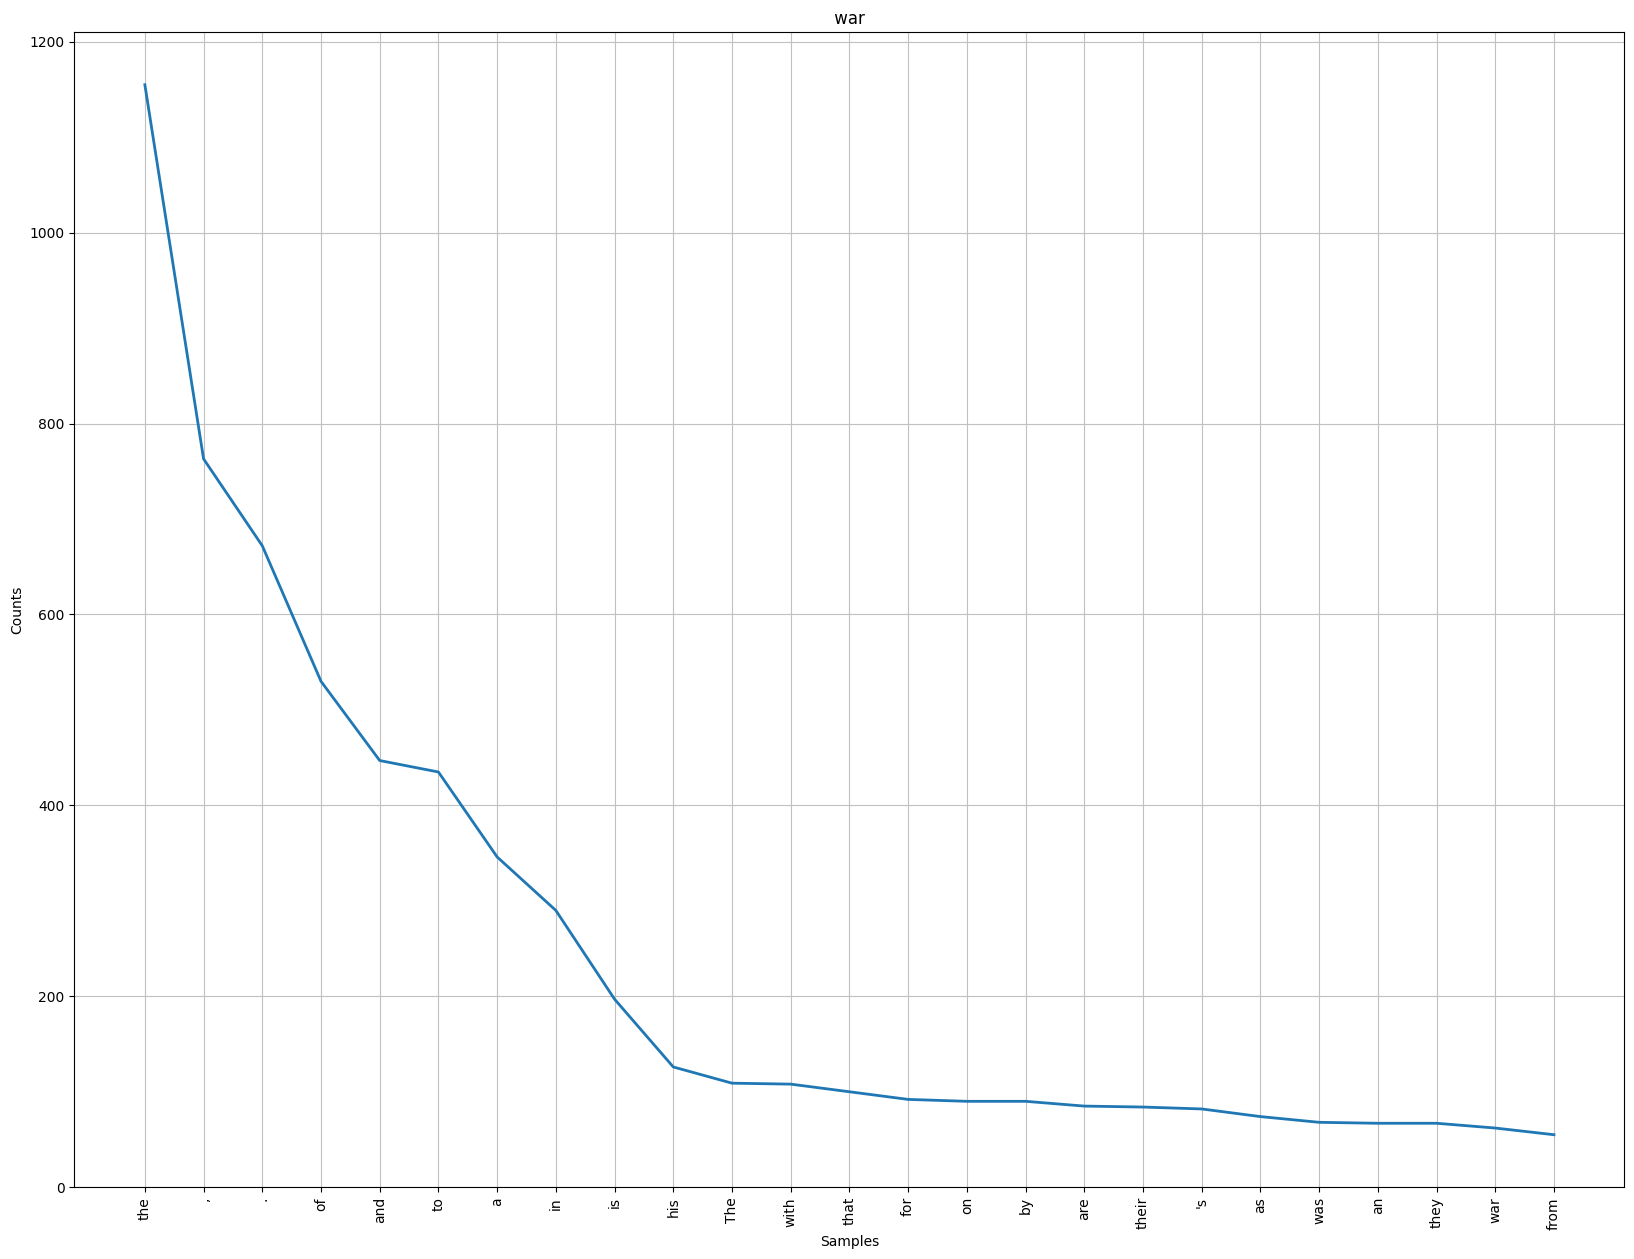

In [25]:
!pip install nltk
import nltk
nltk.download('punkt')

genres=movie_df.genre.unique().tolist()

for genre in genres:
    gen_data=movie_df.description.loc[movie_df.genre==genre]
    desc = gen_data.str.cat(sep=' ')
    #function to split text into word
    tokens = word_tokenize(desc)
    vocabulary = set(tokens)
    frequency_dist = nltk.FreqDist(tokens)
    plt.figure(figsize=(20,15))
    frequency_dist.plot(25,title=genre)

Data Modeling

In [13]:
tfidf_vectorizer=TfidfVectorizer(max_features=5000) # Now TfidVectorizer is defined
X_train=tfidf_vectorizer.fit_transform(movie_df['description'])
y_train=movie_df['genre']
nb_classifier=MultinomialNB()
nb_classifier.fit(X_train,y_train)

# You're also missing the prediction step before calculating accuracy and classification report
y_train_pred = nb_classifier.predict(X_train) # Predict on training data

print("Accuracy on training set:",accuracy_score(y_train,y_train_pred))
print("Classification report on training set:\n",classification_report(y_train,y_train_pred))

Accuracy on training set: 0.5359132327443096


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report on training set:
                precision    recall  f1-score   support

      action        0.70      0.09      0.16      1315
       adult        0.79      0.05      0.10       590
   adventure        0.76      0.05      0.10       775
   animation        0.00      0.00      0.00       498
   biography        0.00      0.00      0.00       265
      comedy        0.56      0.45      0.50      7447
       crime        0.00      0.00      0.00       505
 documentary        0.57      0.90      0.70     13096
       drama        0.47      0.84      0.60     13613
      family        1.00      0.00      0.01       784
     fantasy        0.00      0.00      0.00       323
   game-show        1.00      0.14      0.24       194
     history        0.00      0.00      0.00       243
      horror        0.78      0.36      0.50      2204
       music        0.90      0.16      0.27       731
     musical        0.00      0.00      0.00       277
     mystery        0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
test_df=pd.read_csv("/content/drive/MyDrive/Kaggle/Genre Classification Dataset/test_data.txt",
                        sep=":::" ,names = ['movie' , 'genre' , 'description'] , engine='python')

In [15]:
test_df

,movie,genre,description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard..."


In [16]:
tfidf_vectorizer=TfidfVectorizer(max_features=5000) # Now TfidVectorizer is defined
X_test=tfidf_vectorizer.fit_transform(test_df['description'])

In [17]:
X_test_predictions=nb_classifier.predict(X_test)
test_df['genre_pred']=X_test_predictions

In [18]:
test_df.to_csv('submission.csv',index=False)
print(test_df.head())

   movie                          genre  \
0      1          Edgar's Lunch (1998)    
1      2      La guerra de papá (1977)    
2      3   Off the Beaten Track (2010)    
3      4        Meu Amigo Hindu (2015)    
4      5             Er nu zhai (1955)    

                                         description     genre_pred  
0   L.R. Brane loves his life - his car, his apar...         drama   
1   Spain, March 1964: Quico is a very naughty ch...         drama   
2   One year in the life of Albin and his family ...   documentary   
3   His father has died, he hasn't spoken with hi...   documentary   
4   Before he was known internationally as a mart...   documentary   


Pickling the data
* Pickling in python is primarily used in serializing and deserializing a Python object structure. In other words,its the process of converting a python object into a byte stream to store it in a file/database,maintain program state across sessions, or transport data over the network.

In [20]:
import pickle
with open('tfidf_vectorizer.pkl','wb') as file:
  pickle.dump(tfidf_vectorizer,file)
with open('nb_classifier.pkl','wb') as file:
  pickle.dump(nb_classifier,file)
  print("Models pickled successfully")

Models pickled successfully
